# <span style="color: yellow; font-weight: bold;">1.Project Title: [Data Classificcation]</span>
___

#### a. Introduction

- **Objective:** Clearly state the goal of your project. What problem are you trying to solve?
- **Background:** Provide context on why this problem is important or interesting. Mention any relevant research, datasets, or industry relevance.
- **Scope:** Define the boundaries of your project. What will be included, and what will be out of scope?

#### b. Project Overview

- **Project Summary:** A brief overview of the project, including the main steps you will take to achieve the objective.
- **Milestones:** Outline the key milestones or phases of the project. For example:
  - Data Collection
  - Data Preprocessing
  - Model Selection
  - Model Training and Evaluation
  - Results and Conclusion


#### c. About the Author

- **Name:** [Ahmed Ferganey]
- **Background:** Junior Data Scientist and Machine Learning Engineer with a strong foundation in embedded systems, industrial engineering, and supply chain management. Knowledgeable in statistical analysis, NLP, Computer Vision, and deep learning, with hands-on experience in Python, SQL, and Docker.
- **Motivation:** Why are you interested in this project? What do you hope to learn or achieve?
- **Contact:** [LinkedIn acc](https://www.linkedin.com/in/ahmed-ferganey/)



#### d. Tools and Technologies

- **Programming Languages:** List the programming languages you will use (e.g., Python).
- **Libraries and Frameworks:** List the specific libraries and frameworks you will use (e.g., TensorFlow, scikit-learn).
- **Software and Tools:** Mention any software or tools necessary for the project (e.g., Jupyter Notebook, Git).

#### e. Dataset Description

- **Dataset Name:** [Name of the Dataset]
- **Source:** Where did you obtain the dataset? Include a link if possible.
- **Description:** Briefly describe the dataset, including the number of features, the target variable, and any other important details.
- **Data Preprocessing:** Outline any preprocessing steps you anticipate, such as data cleaning, normalization, or feature engineering.

#### f. Methodology

- **Model Selection:** Describe the types of models you are considering and why.
- **Evaluation Metrics:** Define how you will evaluate your models' performance (e.g., accuracy, F1-score).
- **Validation Strategy:** Explain how you will validate your models, such as cross-validation or a 


# <span style="color: yellow; font-weight: bold;">**2. Importing libraries**</span>

In [1009]:
import pandas as pd
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import joblib 
import statsmodels.formula.api as smf
from sklearn.base import BaseEstimator, TransformerMixin



# <span style="color: red; font-weight: bold;">**3. Preprocessing and Feature Extraction**</span>

In [1010]:
# Load the dataset
path = '/media/ahmed-ferganey/AI4/05-InterviewQuestions/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.csv'  # Replace with the actual dataset URL or path
OriginalData = pd.read_csv(path)

In [1011]:
OriginalData

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [1012]:
OriginalData.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [1013]:
for i in range(120000, 400000, 35000):
    count = OriginalData[OriginalData['km_driven'] >= i].shape[0]
    print(f"km_driven >= {i}: {count}")

km_driven >= 120000: 522
km_driven >= 155000: 161
km_driven >= 190000: 85
km_driven >= 225000: 36
km_driven >= 260000: 19
km_driven >= 295000: 15
km_driven >= 330000: 7
km_driven >= 365000: 4


In [1014]:
for i in range(1, 20000, 1000):
    count = OriginalData[OriginalData['km_driven'] <= i].shape[0]
    print(f"km_driven <= {i}: {count}")

km_driven <= 1: 1
km_driven <= 1001: 24
km_driven <= 2001: 52
km_driven <= 3001: 61
km_driven <= 4001: 73
km_driven <= 5001: 116
km_driven <= 6001: 130
km_driven <= 7001: 137
km_driven <= 8001: 168
km_driven <= 9001: 175
km_driven <= 10001: 261
km_driven <= 11001: 289
km_driven <= 12001: 323
km_driven <= 13001: 338
km_driven <= 14001: 359
km_driven <= 15001: 443
km_driven <= 16001: 450
km_driven <= 17001: 460
km_driven <= 18001: 466
km_driven <= 19001: 483


In [1015]:
# Predefined list of car brands for better accuracy
car_brands = ['maruti', 'hyundai', 'datsun', 'honda', 'tata', 'chevrolet', 'toyota', 'jaguar', 'mercedesbenz', 
              'ford', 'mahindra', 'volkswagen', 'audi', 'skoda', 'jeep', 'bmw', 'nissan', 'renault', 'fiat', 
              'volvo', 'mitsubishi', 'land rover', 'mg', 'ambassador', 'kia']


In [1016]:

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to extract brand name from the car name
def extract_brand(name):
    name_parts = name.split()  # Split the name into parts (words)
    # Check if the first word (or first two words) match any known brands
    for i in range(1, 3):  # Check first one and two words (to handle names like 'Mercedes-Benz')
        potential_brand = ' '.join(name_parts[:i]).lower()
        if potential_brand in car_brands:
            return potential_brand.capitalize()  # Return brand name with capitalized first letter
    return 'Unknown'  # Return 'Unknown' if no match is found

# Function to apply preprocessing
def preprocess_data(df):
    df['processed_name'] = df['name'].apply(preprocess_text)
    df['car_brand'] = df['processed_name'].apply(extract_brand)
    return df

In [1017]:
# get all unique values from the OriginalData['name'] column
unique_values = OriginalData['name'].unique()

# Display the unique values
print(unique_values)

# Get the length of the unique values
length_of_unique_values = len(unique_values)

# Display the length
print('length_of_unique_values= ' ,length_of_unique_values)

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
length_of_unique_values=  1491


In [1018]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
OriginalData['processed_name'] = OriginalData['name'].apply(preprocess_text)

OriginalData['processed_name']

0                          maruti 800 ac
1               maruti wagon r lxi minor
2                    hyundai verna 16 sx
3                 datsun redigo t option
4                   honda amaze vx idtec
                      ...               
4335    hyundai i20 magna 14 crdi diesel
4336           hyundai i20 magna 14 crdi
4337                 maruti 800 ac bsiii
4338     hyundai creta 16 crdi sx option
4339                    renault kwid rxt
Name: processed_name, Length: 4340, dtype: object

In [1019]:
OriginalData['processed_name']

0                          maruti 800 ac
1               maruti wagon r lxi minor
2                    hyundai verna 16 sx
3                 datsun redigo t option
4                   honda amaze vx idtec
                      ...               
4335    hyundai i20 magna 14 crdi diesel
4336           hyundai i20 magna 14 crdi
4337                 maruti 800 ac bsiii
4338     hyundai creta 16 crdi sx option
4339                    renault kwid rxt
Name: processed_name, Length: 4340, dtype: object

In [1020]:
# get all unique values from the OriginalData['name'] column
unique_values = OriginalData['processed_name'].unique()

# Convert to list (optional, unique_values is already a numpy array)
unique_values_list = unique_values.tolist()

# Display the unique values
print("Unique values:", unique_values_list)


# Get the length of the unique values
length_of_unique_values = len(unique_values)

# Display the length
print('length_of_unique_values= ' ,length_of_unique_values)

Unique values: ['maruti 800 ac', 'maruti wagon r lxi minor', 'hyundai verna 16 sx', 'datsun redigo t option', 'honda amaze vx idtec', 'maruti alto lx bsiii', 'hyundai xcent 12 kappa s', 'tata indigo grand petrol', 'hyundai creta 16 vtvt s', 'maruti celerio green vxi', 'chevrolet sail 12 base', 'toyota corolla altis 18 vl cvt', 'maruti ciaz vxi plus', 'hyundai venue sx opt diesel', 'chevrolet enjoy tcdi ltz 7 seater', 'jaguar xf 22 litre luxury', 'mercedesbenz new cclass 220 cdi at', 'maruti vitara brezza zdi plus amt', 'audi q5 20 tdi', 'honda city v mt', 'tata tigor 12 revotron xt', 'audi a6 20 tdi  design edition', 'mercedesbenz new cclass c 220 cdi avantgarde', 'skoda superb ambition 20 tdi cr at', 'toyota corolla altis g at', 'toyota innova 25 g diesel 7 seater', 'jeep compass 14 sport plus bsiv', 'mercedesbenz eclass e 200 cgi elegance', 'hyundai i10 magna 11l', 'bmw 3 series 320d sport line', 'audi q7 35 tdi quattro premium', 'hyundai elantra crdi s', 'mahindra scorpio 199 s10', 

In [1021]:
# Predefined list of car brands for better accuracy
car_brands = ['maruti', 'hyundai', 'datsun', 'honda', 'tata', 'chevrolet', 'toyota', 'jaguar', 'mercedesbenz', 'ford' ,
              'mahindra','volkswagen', 'audi', 'skoda', 'jeep', 'bmw', 'nissan', 'renault', 'fiat', 'volvo', 'mitsubishi', 
              'mitsubishi', 'land rover', 'mg', 'ambassador', 'kia']

# Function to extract brand name from the car name
def extract_brand(name):
    name_parts = name.split()  # Split the name into parts (words)
    
    # Check if the first word (or first two words) match any known brands
    for i in range(1, 3):  # Check first one and two words (to handle names like 'Mercedes-Benz')
        potential_brand = ' '.join(name_parts[:i]).lower()
        if potential_brand in car_brands:
            return potential_brand.capitalize()  # Return brand name with capitalized first letter
    return None  # Return None if no match is found


In [1022]:
# Apply the function to the 'processed_name' column in the OriginalData DataFrame
OriginalData['BrandName'] = OriginalData['processed_name'].apply(extract_brand)


In [1023]:
OriginalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4340 non-null   object
 1   year            4340 non-null   int64 
 2   selling_price   4340 non-null   int64 
 3   km_driven       4340 non-null   int64 
 4   fuel            4340 non-null   object
 5   seller_type     4340 non-null   object
 6   transmission    4340 non-null   object
 7   owner           4340 non-null   object
 8   processed_name  4340 non-null   object
 9   BrandName       4335 non-null   object
dtypes: int64(3), object(7)
memory usage: 339.2+ KB


In [1024]:
# Removing duplication rows
#######################################

# Check for missing values
print(OriginalData.isnull().sum())

#######################################

duplicates = OriginalData.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#######################################

# Remove duplicate rows
cleaned_data_no_duplication_V1 = OriginalData.drop_duplicates()

# Check the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {cleaned_data_no_duplication_V1.shape[0]}")

# Verify no duplicates remain
duplicates_after = cleaned_data_no_duplication_V1.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after}")


# Drop the specified columns
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop(columns=['name', 'processed_name'])

# Remove rows with any null values
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.dropna()


# Save cleaned data to a CSV file
cleaned_data_no_duplication_V1.to_csv('cleaned_data_no_duplication_V1.csv', index=False)

#######################################

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
processed_name    0
BrandName         5
dtype: int64
Number of duplicate rows: 763
Number of rows after removing duplicates: 3577
Number of duplicate rows after cleaning: 0


In [1025]:
# Reset the index of the DataFrame and drop the old index
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.reset_index(drop=True)
cleaned_data_no_duplication_V1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3572 non-null   int64 
 1   selling_price  3572 non-null   int64 
 2   km_driven      3572 non-null   int64 
 3   fuel           3572 non-null   object
 4   seller_type    3572 non-null   object
 5   transmission   3572 non-null   object
 6   owner          3572 non-null   object
 7   BrandName      3572 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.4+ KB


In [1026]:
cleaned_data_no_duplication_V1

year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
3567  2014         409999      80000  Diesel  Individual       Manual   
3568  2014         409999      80000  Diesel  Individual       Manual   
3569  2009         110000      83000  Petrol  Individual       Manual   
3570  2016         865000      90000  Diesel  Individual       Manual   
3571  2016         225000      40000  Petrol  Individual       Manual   

             owner BrandName  
0      First Owner    Maruti  
1      First Owner    Maruti  
2      First Owner   Hyundai  
3      First Owner    Datsun  
4     Second Owner     Honda  
...            ...       ...  
3567  Second Owner   Hyundai  
3568  Second Owner   Hyundai  
3569  Second Owner    Maruti  
3570   First Owner   Hyundai  
3571   First Owner   Renault  

[3572 rows x 8 columns]

In [1027]:
# Count the occurrences of each unique value in the 'BrandName' column
brand_counts = cleaned_data_no_duplication_V1['BrandName'].value_counts()

# Display the counts sorted from highest to lowest
print(brand_counts)

BrandName
Maruti          1072
Hyundai          637
Mahindra         328
Tata             308
Ford             220
Honda            216
Toyota           170
Chevrolet        151
Renault          110
Volkswagen        93
Nissan            52
Skoda             49
Fiat              32
Audi              31
Datsun            29
Bmw               25
Mercedesbenz      21
Jaguar             5
Mitsubishi         5
Land rover         5
Volvo              4
Jeep               3
Ambassador         3
Mg                 2
Kia                1
Name: count, dtype: int64


#### **Pipeline steps**

In [1028]:
# functions definition

# Custom transformer for preprocessing text data (including brand extraction)
class BrandExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, car_brands):
        self.car_brands = car_brands
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(self.extract_brand)
    
    def extract_brand(self, name):
        name_parts = name.split()  # Split the name into parts (words)
        for i in range(1, 3):  # Check first one and two words (to handle names like 'Mercedes-Benz')
            potential_brand = ' '.join(name_parts[:i]).lower()
            if potential_brand in self.car_brands:
                return potential_brand.capitalize()  # Return brand name with capitalized first letter
        return None  # Return None if no match is found

# Define log transformation function
def log_transform(x):
    return np.log1p(x)

# Custom function to replace low-count fuel types
def replace_low_count_fuels(df):
    df['fuel'] = df['fuel'].replace({
        'LPG': 'Other',
        'CNG': 'Other',
        'Electric': 'Other'
    })
    return df

# Create transformers for each step
class LogTransformer(FunctionTransformer):
    def __init__(self, **kwargs):
        super().__init__(func=log_transform, **kwargs)

class ReplaceLowCountFuels(FunctionTransformer):
    def __init__(self, **kwargs):
        super().__init__(func=replace_low_count_fuels, **kwargs)



In [1029]:
# # Step 1: Define categorical and numerical features
# categorical_features = ['BrandName', 'transmission', 'seller_type', 'fuel']
# numerical_features = ['km_driven', 'year']

# # Step 2: Pipeline for text preprocessing and brand extraction
# text_preprocessing_pipeline = Pipeline(steps=[
#     ('brand_extractor', BrandExtractor(car_brands))

# # Step 3: Preprocessing (Log transform, scaling, and One-hot encoding for numerical and categorical data)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('text', text_preprocessing_pipeline, 'name'),  # Text preprocessing for the 'name' column
#         ('num_km', Pipeline(steps=[
#             ('log', FunctionTransformer(func=log_transform, validate=False)),  # Log transformation for `km_driven`
#             ('scaler', StandardScaler())  # Scaling numerical data
#         ]), ['km_driven']),  # Apply only to `km_driven`
#         ('num_year', StandardScaler(), ['year']),  # Scaling for `year`
#         ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding for categorical data
#     ],
#     remainder='passthrough'  # Keep any other columns 
# )

# # Step 4: Create a full pipeline with preprocessing and any additional steps (e.g., model fitting)
# pipeline = Pipeline(steps=[
#     ('replace_fuels', ReplaceLowCountFuels(validate=False)),
#     ('preprocessor', preprocessor),
#     ('drop', FunctionTransformer(lambda df: df.drop(['owner'], axis=1), validate=False))  # Optionally drop columns
# ])

# """
#     ('pca', PCA(n_components=2)),  # Dimensionality reduction
#     ('clustering', KMeans(n_clusters=5)),  # Clustering
#     ('classifier', LogisticRegression())  # Classification model
# """

# # Apply the pipeline to the data
# processed_data = pipeline.fit_transform(cleaned_data_no_duplication_V1)    


# # Convert the result back to a DataFrame
# processed_data_df = pd.DataFrame(processed_data, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())




# <span style="color: gray; font-weight: bold;">**4. Statistics and Feature Engineering**</span>

In [1030]:
cleaned_data_no_duplication_V1

year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
3567  2014         409999      80000  Diesel  Individual       Manual   
3568  2014         409999      80000  Diesel  Individual       Manual   
3569  2009         110000      83000  Petrol  Individual       Manual   
3570  2016         865000      90000  Diesel  Individual       Manual   
3571  2016         225000      40000  Petrol  Individual       Manual   

             owner BrandName  
0      First Owner    Maruti  
1      First Owner    Maruti  
2      First Owner   Hyundai  
3      First Owner    Datsun  
4     Second Owner     Honda  
...            ...       ...  
3567  Second Owner   Hyundai  
3568  Second Owner   Hyundai  
3569  Second Owner    Maruti  
3570   First Owner   Hyundai  
3571   First Owner   Renault  

[3572 rows x 8 columns]

In [1031]:
# Log transformation to handle right-skewness in the selling_price column
cleaned_data_no_duplication_V1['log_SellingPrice'] = np.log(cleaned_data_no_duplication_V1['selling_price'] + 1)  # Add 1 to avoid log(0)

# Drop the original selling_price column as it's no longer needed
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop(['selling_price'], axis=1)


In [1032]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3567  2014      80000  Diesel  Individual       Manual  Second Owner   
3568  2014      80000  Diesel  Individual       Manual  Second Owner   
3569  2009      83000  Petrol  Individual       Manual  Second Owner   
3570  2016      90000  Diesel  Individual       Manual   First Owner   
3571  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3567   Hyundai         12.923912  
3568   Hyundai         12.923912  
3569    Maruti         11.608245  
3570   Hyundai         13.670486  
3571   Renault         12.323860  

[3572 rows x 8 columns]

In [1033]:
# Combine low-count categories into a single category called 'Other'
cleaned_data_no_duplication_V1['fuel'] = cleaned_data_no_duplication_V1['fuel'].replace({
    'LPG': 'Other',
    'CNG': 'Other',
    'Electric': 'Other'
})

# Check the updated distribution of fuel categories
print(cleaned_data_no_duplication_V1['fuel'].value_counts())


fuel
Diesel    1798
Petrol    1714
Other       60
Name: count, dtype: int64


In [1034]:
# Define the function to count outliers based on IQR
def count_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = pd.Series(0, index=data.index)
    for category in data[var].unique():
        outliers += ((data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category])))
    
    return outliers.sum()


# Define the function to flag outliers based on IQR
def flag_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a boolean series to flag outliers
    outliers = pd.Series(False, index=data.index)
    for category in data[var].unique():
        outliers |= (data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category]))
    
    return outliers    

Total unique outliers across all categories: 97


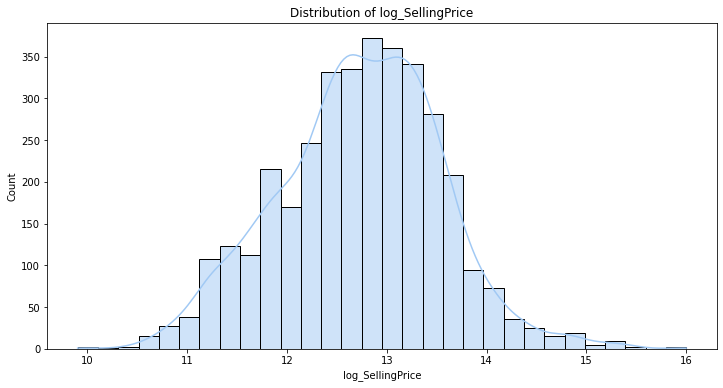

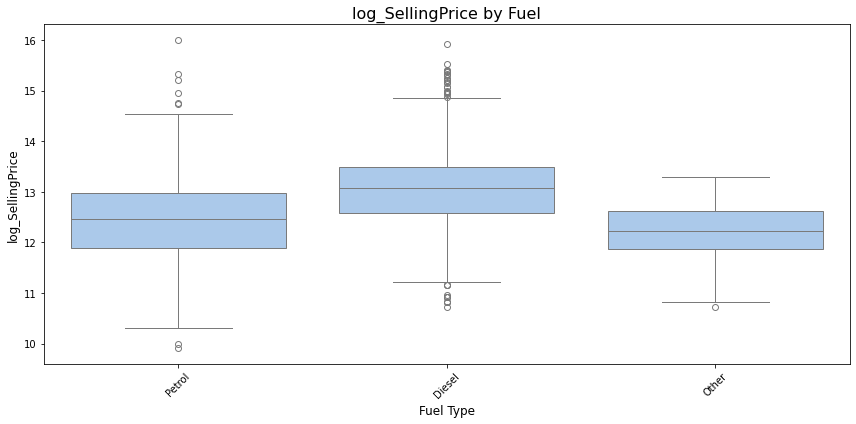

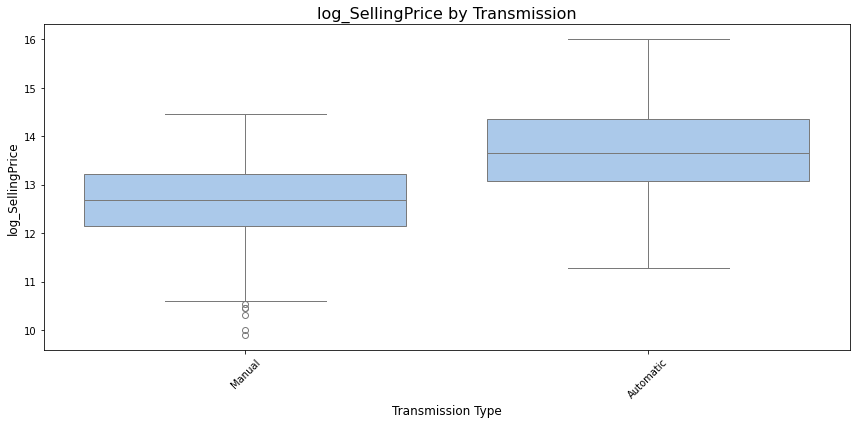

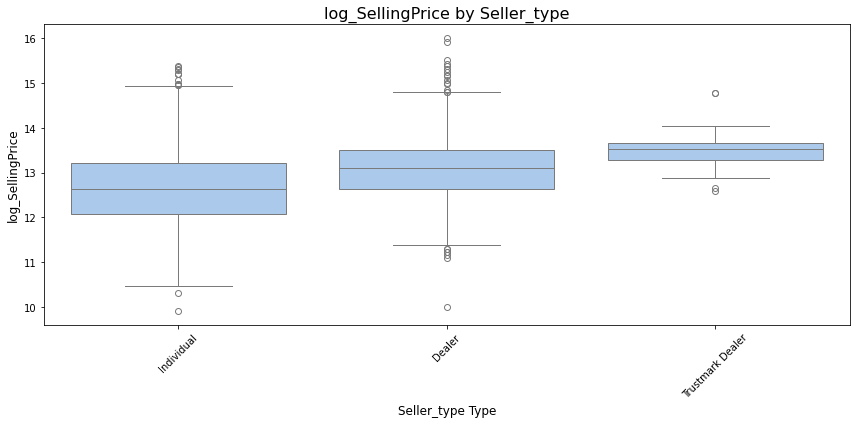

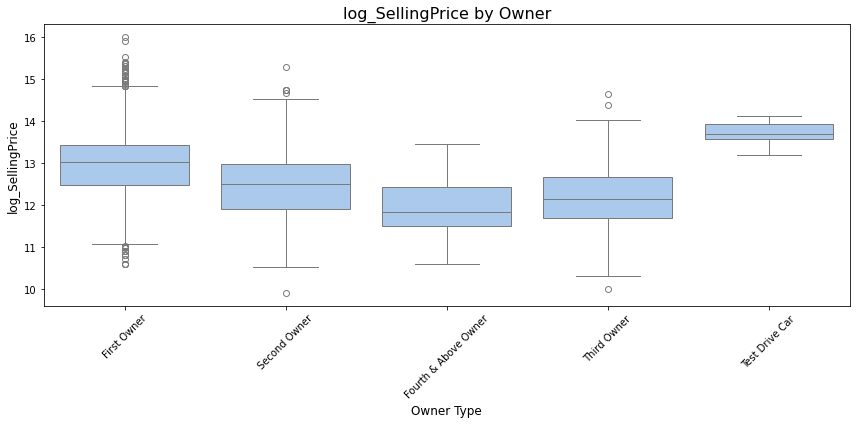

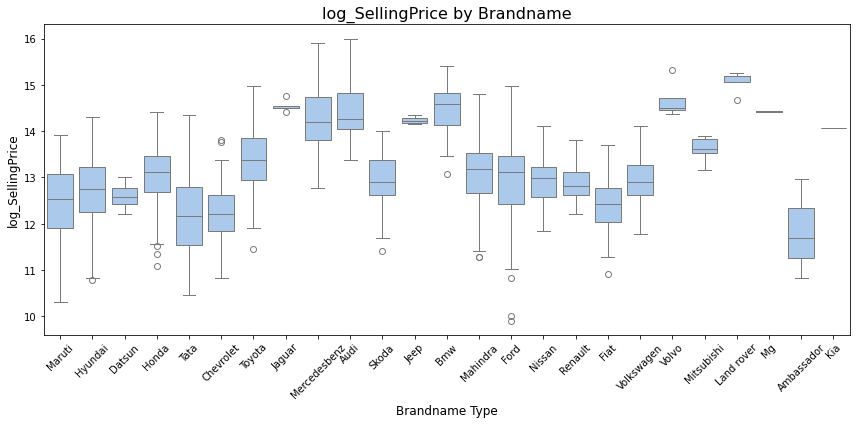

In [1035]:
# Set a broader color palette
sns.set_palette("pastel")

# List of categorical variables to plot
categorical_vars = ['fuel', 'transmission', 'seller_type', 'owner', 'BrandName']

# Create an outlier flag for each variable and combine them
cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] = False
for var in categorical_vars:
    outlier_flags = flag_outliers(cleaned_data_no_duplication_V1, var, 'log_SellingPrice')
    cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] |= outlier_flags

# Count total unique outliers
total_unique_outliers = cleaned_data_no_duplication_V1['is_outlier'].sum()
print(f"Total unique outliers across all categories: {total_unique_outliers}")

# Visualize continuous variables (histogram and boxplot)
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data_no_duplication_V1['log_SellingPrice'], bins=30, kde=True)
plt.title('Distribution of log_SellingPrice')
plt.show()

# Create boxplots in a loop and show outliers
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='log_SellingPrice', data=cleaned_data_no_duplication_V1, showfliers=True)  # Show outliers
    plt.title(f"log_SellingPrice by {var.capitalize()}", fontsize=16)
    plt.xlabel(var.capitalize() + ' Type', fontsize=12)
    plt.ylabel('log_SellingPrice', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [1036]:
# Create a DataFrame for outliers
outliers_data_V1 = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['is_outlier'] == True]

# Save the outliers to a CSV for further investigation
outliers_data_V1.to_csv('outliers_data_V1.csv', index=False)


In [1037]:
outliers_data_V1.describe()

year      km_driven  log_SellingPrice
count    97.000000      97.000000         97.000000
mean   2010.474227   61449.082474         12.777504
std       6.296647   38587.634553          2.038558
min    1998.000000    1500.000000          9.903538
25%    2005.000000   35000.000000         10.915107
50%    2011.000000   57000.000000         11.407576
75%    2017.000000   80000.000000         14.930652
max    2020.000000  195000.000000         16.001562

In [1038]:
cleaned_data_no_duplication_V1.describe()

year      km_driven  log_SellingPrice
count  3572.000000    3572.000000       3572.000000
mean   2012.969485   69263.349944         12.731283
std       4.243290   47603.846430          0.815875
min    1992.000000       1.000000          9.903538
25%    2010.000000   36000.000000         12.206078
50%    2013.000000   60104.000000         12.765691
75%    2016.000000   90000.000000         13.304687
max    2020.000000  806599.000000         16.001562

In [1039]:
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop('is_outlier', axis=1)


In [1040]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3567  2014      80000  Diesel  Individual       Manual  Second Owner   
3568  2014      80000  Diesel  Individual       Manual  Second Owner   
3569  2009      83000  Petrol  Individual       Manual  Second Owner   
3570  2016      90000  Diesel  Individual       Manual   First Owner   
3571  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3567   Hyundai         12.923912  
3568   Hyundai         12.923912  
3569    Maruti         11.608245  
3570   Hyundai         13.670486  
3571   Renault         12.323860  

[3572 rows x 8 columns]

#### **One-Way ANOVA**

In [1041]:

# Test whether selling prices differ across fuel categories
fuel_groups = [cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel]['log_SellingPrice'] for fuel in cleaned_data_no_duplication_V1['fuel'].unique()]
anova_result = stats.f_oneway(*fuel_groups)

print(f"ANOVA Test Result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA Test Result: F-statistic=306.05267671833866, p-value=2.1150836883317966e-123


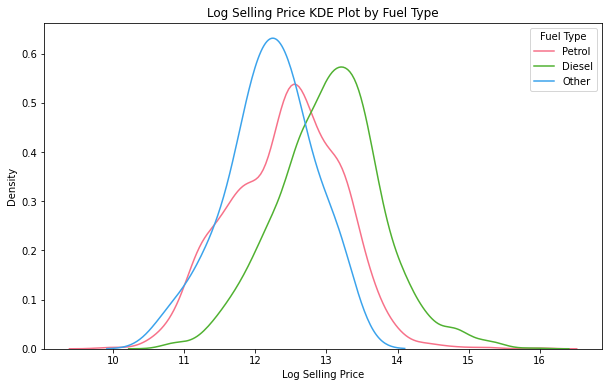

In [1042]:
# Set up a color palette with unique colors for each fuel type
colors = sns.color_palette("husl", len(cleaned_data_no_duplication_V1['fuel'].unique()))

# KDE plot for log selling price per fuel type with different colors
plt.figure(figsize=(10, 6))

# Loop through fuel types and assign a unique color from the palette
for i, fuel_type in enumerate(cleaned_data_no_duplication_V1['fuel'].unique()):
    # Calculate variance for the current fuel type
    variance = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel_type]['log_SellingPrice'].var()
    
    # Skip plotting if variance is zero
    if variance > 0:
        sns.kdeplot(
            cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] == fuel_type]['log_SellingPrice'], 
            label=fuel_type, 
            color=colors[i]
        )
    else:
        print(f"Skipping KDE for {fuel_type} due to zero variance.")

plt.title('Log Selling Price KDE Plot by Fuel Type')
plt.xlabel('Log Selling Price')
plt.ylabel('Density')
plt.legend(title='Fuel Type')
plt.show()

In [1043]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3567  2014      80000  Diesel  Individual       Manual  Second Owner   
3568  2014      80000  Diesel  Individual       Manual  Second Owner   
3569  2009      83000  Petrol  Individual       Manual  Second Owner   
3570  2016      90000  Diesel  Individual       Manual   First Owner   
3571  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3567   Hyundai         12.923912  
3568   Hyundai         12.923912  
3569    Maruti         11.608245  
3570   Hyundai         13.670486  
3571   Renault         12.323860  

[3572 rows x 8 columns]

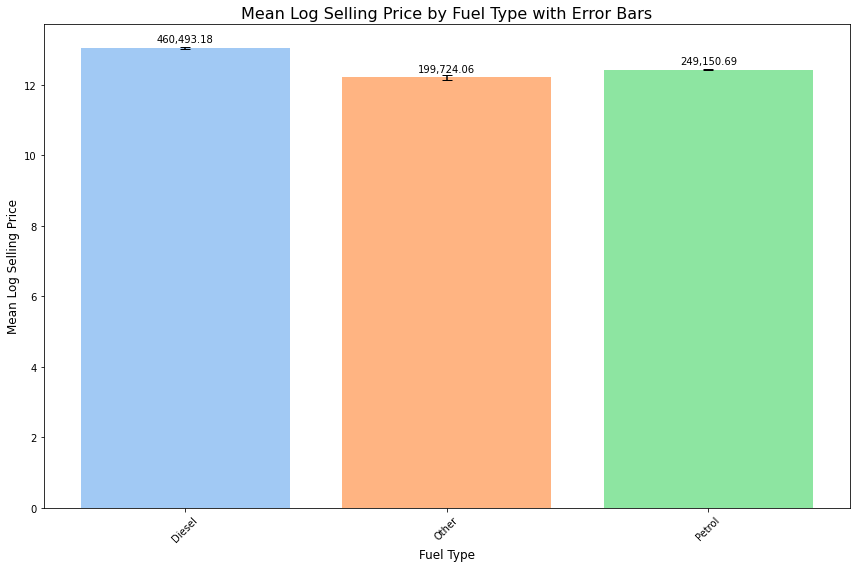

In [1044]:
# Calculate mean and standard error for each fuel category
mean_prices = cleaned_data_no_duplication_V1.groupby('fuel')['log_SellingPrice'].mean()
std_errors = cleaned_data_no_duplication_V1.groupby('fuel')['log_SellingPrice'].sem()

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
bars = plt.bar(
    mean_prices.index, 
    mean_prices.values, 
    yerr=std_errors.values, 
    capsize=5, 
    color=sns.color_palette("pastel", n_colors=len(mean_prices))
)

# Add titles and labels
plt.title('Mean Log Selling Price by Fuel Type with Error Bars', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Mean Log Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with mean values in original scale
for bar in bars:
    height = bar.get_height()
    original_scale_value = np.exp(height)  # Convert log scale back to original scale
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height + 0.1,  # Adjust placement for readability
        f'{original_scale_value:,.2f}',  # Format the value in original scale
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.show()

In [1045]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3567  2014      80000  Diesel  Individual       Manual  Second Owner   
3568  2014      80000  Diesel  Individual       Manual  Second Owner   
3569  2009      83000  Petrol  Individual       Manual  Second Owner   
3570  2016      90000  Diesel  Individual       Manual   First Owner   
3571  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3567   Hyundai         12.923912  
3568   Hyundai         12.923912  
3569    Maruti         11.608245  
3570   Hyundai         13.670486  
3571   Renault         12.323860  

[3572 rows x 8 columns]

In [1046]:
# Count the number of entries for each fuel type
fuel_counts = cleaned_data_no_duplication_V1.groupby('fuel').size()

# Display the counts
print(fuel_counts)


fuel
Diesel    1798
Other       60
Petrol    1714
dtype: int64


In [1047]:
# Remove rows where the fuel type is 'Other'
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['fuel'] != 'Other']

# Reset the index
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.reset_index(drop=True)

# Check the updated distribution of fuel categories
print(cleaned_data_no_duplication_V1['fuel'].value_counts())

fuel
Diesel    1798
Petrol    1714
Name: count, dtype: int64


In [1048]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3507  2014      80000  Diesel  Individual       Manual  Second Owner   
3508  2014      80000  Diesel  Individual       Manual  Second Owner   
3509  2009      83000  Petrol  Individual       Manual  Second Owner   
3510  2016      90000  Diesel  Individual       Manual   First Owner   
3511  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3507   Hyundai         12.923912  
3508   Hyundai         12.923912  
3509    Maruti         11.608245  
3510   Hyundai         13.670486  
3511   Renault         12.323860  

[3512 rows x 8 columns]

In [1049]:
# ANOVA for categorical predictors
categorical_columns = ['fuel', 'transmission', 'seller_type', 'owner', 'BrandName']

for column in categorical_columns:
    groups = [cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1[column] == category]['log_SellingPrice'] for category in cleaned_data_no_duplication_V1[column].unique()]
    anova_result = stats.f_oneway(*groups)
    print(f'ANOVA for {column}: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

ANOVA for fuel: F-statistic=578.9489531345004, p-value=1.5433708875936255e-118
ANOVA for transmission: F-statistic=541.9707342532084, p-value=1.3333266140856984e-111
ANOVA for seller_type: F-statistic=112.40743142013861, p-value=4.8102406338358507e-48
ANOVA for owner: F-statistic=141.6095841224797, p-value=2.3273946535953414e-112
ANOVA for BrandName: F-statistic=57.60111392707594, p-value=1.6218594193587675e-231


#### **Two-Way ANOVA**

In [1050]:
# Ensure the categorical variables are treated as factors
cleaned_data_no_duplication_V1['transmission'] = cleaned_data_no_duplication_V1['transmission'].astype('category')
cleaned_data_no_duplication_V1['fuel'] = cleaned_data_no_duplication_V1['fuel'].astype('category')

# Fit the Two-Way ANOVA model
Two_Way_ANOVA_MODEL = smf.ols('log_SellingPrice ~ C(transmission) * C(fuel)', data=cleaned_data_no_duplication_V1).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(Two_Way_ANOVA_MODEL, typ=2)
print(anova_table)

                              sum_sq      df           F         PR(>F)
C(transmission)           299.137348     1.0  616.887299  1.389928e-125
C(fuel)                   317.454964     1.0  654.662269  1.541217e-132
C(transmission):C(fuel)     6.977531     1.0   14.389211   1.511575e-04
Residual                 1701.078657  3508.0         NaN            NaN


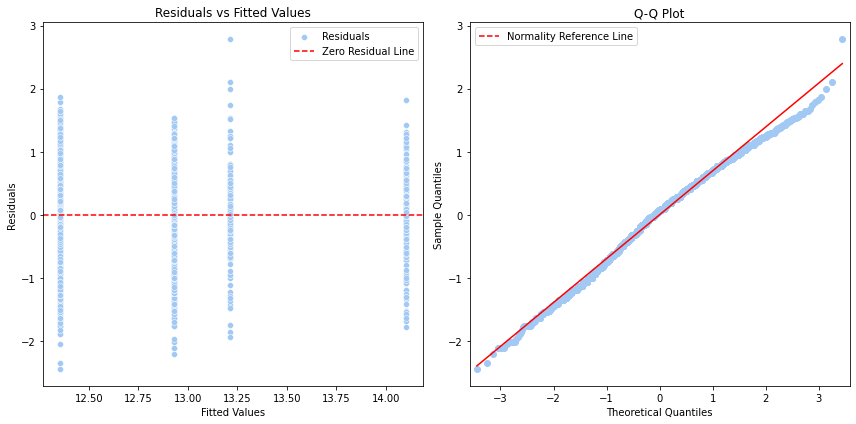

In [1051]:

# Plot residuals vs fitted values "Diagnostic plots"
fitted_values = Two_Way_ANOVA_MODEL.fittedvalues
residuals = Two_Way_ANOVA_MODEL.resid

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, label='Residuals')  # Scatter plot of fitted values vs residuals (blue points)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')  # Scatter plot of fitted values vs residuals (blue points))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')  # Title of the plot
plt.legend()  # Show legend to label blue points and red line

# Plot Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.plot([], [], 'r--', label='Normality Reference Line')  # Add a red dashed line as the normality reference line
plt.title('Q-Q Plot')  # Title of the Q-Q plot
plt.legend()  # Show legend to label the blue points and the red reference line

plt.tight_layout()
plt.show()

***********Interpretation:***********

    - The p-value of C(fuel):- Fuel type has a significant effect on selling price.

    - The p-value of C(transmission):- Transmission type also has a significant effect on selling price.

    - The p-value of C(fuel):C(transmission):-  There is a significant interaction effect between fuel type and transmission type on selling price.


**Conclusion:**

    The Residuals vs Fitted Values plot suggests potential heteroscedasticity, which means the error variance may not be constant across all predicted values.

    The Q-Q Plot shows deviations from normality, especially in the tails, indicating possible outliers or that the residuals do not perfectly follow a normal distribution.

**The diagnostic plots** 

    (Residuals vs. Fitted Values and Q-Q Plot) are helpful for visual inspection. 

    Residuals vs. Fitted Values: Residuals should be randomly scattered around zero, without any discernible pattern.

    Q-Q Plot: Residuals should approximately follow a straight line if they are normally distributed.

**In summary:**

    Centered around zero: The residuals being centered around zero indicates the model predictions are unbiased 'no under-fitting or over-fitting'. 

    Varying spread (heteroscedasticity): The increasing spread of residuals for larger fitted values may suggest heteroscedasticity, which could be an issue that should be addressed.

    No clear non-linear pattern: The lack of a clear pattern indicates that there are no obvious systematic errors (like non-linear relationships) that the model is failing to capture.

In [1052]:
# Print first few fitted values and residuals
print("Fitted Values:")
print(fitted_values.head())

print("\nResiduals:")
print(residuals.head())

# Optional: Print statistical summary of residuals
print("\nResiduals Summary Statistics:")
print(residuals.describe())

Fitted Values:
0    12.355365
1    12.355365
2    12.929297
3    12.355365
4    12.929297
dtype: float64

Residuals:
0   -1.353249
1   -0.542328
2    0.375389
3    0.073855
4    0.087708
dtype: float64

Residuals Summary Statistics:
count    3.512000e+03
mean    -8.042162e-15
std      6.960602e-01
min     -2.451828e+00
25%     -4.633598e-01
50%      7.385477e-02
75%      4.925637e-01
max      2.789832e+00
dtype: float64


    the predicted values from your model. You can observe that the fitted values are relatively consistent, which may be a result of the model's structure or the data itself.

    Residuals represent the difference between the observed values and the fitted values. Large residuals indicate a significant deviation of the model's predictions from the actual values.

### **Solution:**

**1. Addressing Heteroscedasticity:**

Transformations: Apply transformations (like log transformation) to the dependent variable to stabilize variance.

Robust Standard Errors: Use robust standard errors that can handle heteroscedasticity.

**2. Normality of Residuals:**

Transformation: If residuals deviate significantly from normality, consider applying transformations to the dependent variable or adding polynomial terms to the model.

Alternative Models: In some cases, using models that do not assume normality of residuals (like generalized linear models) may be appropriate.

**3. Consider Alternative Models:**

Tree-Based Methods: Random Forests or Gradient Boosting can be useful if the residuals indicate a non-linear relationship.

Generalized Linear Models: If heteroscedasticity is a major concern, GLMs might provide a better fit.





**1. Addressing Heteroscedasticity:**



**2. Normality of Residuals:**



**3. Consider Alternative Models:**

#### **Post-Hoc Tests**

Given that all effects are significant, we want to perform post-hoc tests (e.g., Tukey’s HSD) to determine which specific groups differ from each other.

In [1053]:
# Perform Tukey's HSD test for fuel
fuel_comparison = MultiComparison(cleaned_data_no_duplication_V1['log_SellingPrice'], cleaned_data_no_duplication_V1['fuel'])
tukey_fuel = fuel_comparison.tukeyhsd()
print("Tukey's HSD for Fuel:")
print(tukey_fuel)

Tukey's HSD for Fuel:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Diesel Petrol  -0.6142   0.0 -0.6643 -0.5642   True
---------------------------------------------------


**Insights and Applications**

Pricing Strategy:

Strategic Pricing: Understanding which fuel types have significantly different prices can help in setting competitive prices or identifying pricing strategies. For example, if Diesel has a significantly higher price than Petrol, it might be worth investigating why and whether adjustments are needed.

Market Segmentation:

Targeting: If you find significant price differences between fuel types, you can tailor marketing and sales strategies to different segments. For example, if LPG is priced higher than Petrol, you might market it to consumers who are willing to pay a premium for certain features or benefits.

Product Offering:

Product Decisions: Significant differences in prices can guide decisions on product offerings. For instance, if certain fuel types are consistently priced higher, you might consider offering discounts or promotions to attract more buyers.

Resource Allocation:

Budgeting: If pricing differences affect sales volumes, understanding these differences can help allocate resources effectively. For example, if Diesel is more expensive but also more popular, you might allocate more resources to stock and promote Diesel vehicles.

Customer Insights:

Consumer Behavior: Analyzing the differences in prices across fuel types can provide insights into consumer preferences and behaviors. If some fuel types are consistently priced higher, it might indicate higher demand or perceived value.

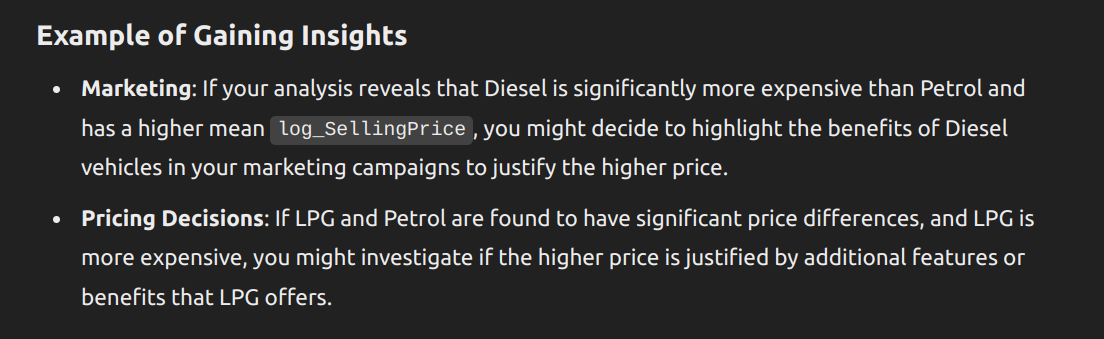

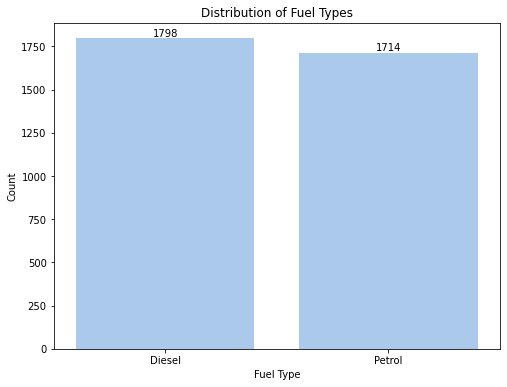

In [1054]:
# Plot the distribution of fuel types
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=cleaned_data_no_duplication_V1, x='fuel')

# Add labels for counts on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    ax.text(x, y, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

#### **Feature Engineering and Encoding**

In [1055]:
cleaned_data_no_duplication_V1

year  km_driven    fuel seller_type transmission         owner  \
0     2007      70000  Petrol  Individual       Manual   First Owner   
1     2007      50000  Petrol  Individual       Manual   First Owner   
2     2012     100000  Diesel  Individual       Manual   First Owner   
3     2017      46000  Petrol  Individual       Manual   First Owner   
4     2014     141000  Diesel  Individual       Manual  Second Owner   
...    ...        ...     ...         ...          ...           ...   
3507  2014      80000  Diesel  Individual       Manual  Second Owner   
3508  2014      80000  Diesel  Individual       Manual  Second Owner   
3509  2009      83000  Petrol  Individual       Manual  Second Owner   
3510  2016      90000  Diesel  Individual       Manual   First Owner   
3511  2016      40000  Petrol  Individual       Manual   First Owner   

     BrandName  log_SellingPrice  
0       Maruti         11.002117  
1       Maruti         11.813037  
2      Hyundai         13.304687  
3       Datsun         12.429220  
4        Honda         13.017005  
...        ...               ...  
3507   Hyundai         12.923912  
3508   Hyundai         12.923912  
3509    Maruti         11.608245  
3510   Hyundai         13.670486  
3511   Renault         12.323860  

[3512 rows x 8 columns]

In [1056]:
# feature engineering

current_year = 2024  # Update to the current year
cleaned_data_no_duplication_V1['car_age'] = current_year - cleaned_data_no_duplication_V1['year']
cleaned_data_no_duplication_V1 = cleaned_data_no_duplication_V1.drop(columns=['year'])
cleaned_data_no_duplication_V1

km_driven    fuel seller_type transmission         owner BrandName  \
0         70000  Petrol  Individual       Manual   First Owner    Maruti   
1         50000  Petrol  Individual       Manual   First Owner    Maruti   
2        100000  Diesel  Individual       Manual   First Owner   Hyundai   
3         46000  Petrol  Individual       Manual   First Owner    Datsun   
4        141000  Diesel  Individual       Manual  Second Owner     Honda   
...         ...     ...         ...          ...           ...       ...   
3507      80000  Diesel  Individual       Manual  Second Owner   Hyundai   
3508      80000  Diesel  Individual       Manual  Second Owner   Hyundai   
3509      83000  Petrol  Individual       Manual  Second Owner    Maruti   
3510      90000  Diesel  Individual       Manual   First Owner   Hyundai   
3511      40000  Petrol  Individual       Manual   First Owner   Renault   

      log_SellingPrice  car_age  
0            11.002117       17  
1            11.813037       17  
2            13.304687       12  
3            12.429220        7  
4            13.017005       10  
...                ...      ...  
3507         12.923912       10  
3508         12.923912       10  
3509         11.608245       15  
3510         13.670486        8  
3511         12.323860        8  

[3512 rows x 8 columns]

In [1057]:
cleaned_data_no_duplication_V1['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [1058]:
mean_log_selling_price = cleaned_data_no_duplication_V1.groupby('owner')['log_SellingPrice'].mean()

# Convert the log mean prices to the original scale
mean_selling_price = np.exp(mean_log_selling_price)

# Sort the means from highest to lowest
sorted_mean_selling_price = mean_selling_price.sort_values(ascending=False)

print(sorted_mean_selling_price)

owner
Test Drive Car          922891.055074
First Owner             422220.339633
Second Owner            257720.916554
Third Owner             196130.970772
Fourth & Above Owner    150582.152894
Name: log_SellingPrice, dtype: float64


**Choosing the Right Method**

**One-Hot Encoding:**

Best for small-to-medium numbers of brands. Works with most machine learning models, but be cautious if you have many unique brands.

**Label Encoding:**

Only use with models that can handle categorical variables (like decision trees or random forests).

**Target Encoding:** 

Useful for tree-based models with many brands, but be cautious about overfitting.

**Frequency Encoding:** 

Simple and compact, good for tree-based models.

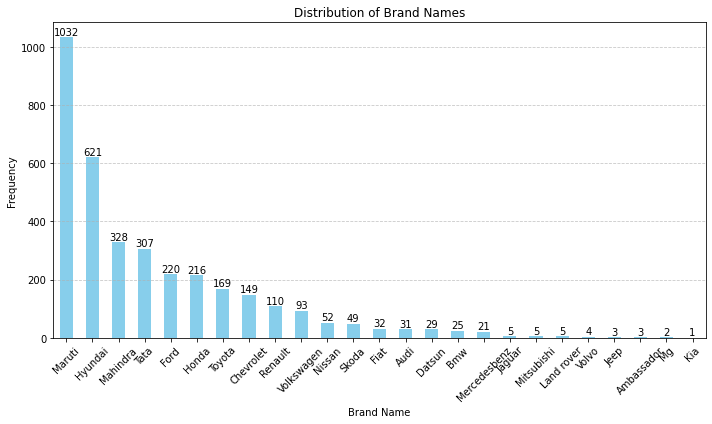

Probability of drawing 'Maruti': 0.2938496583143508


In [1059]:
# Get the counts of each unique value in the 'BrandName' column
brand_counts = cleaned_data_no_duplication_V1['BrandName'].value_counts()

# Plot a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
bar_plot = brand_counts.plot(kind='bar', color='skyblue')

# Add labels above each bar
for index, value in enumerate(brand_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

# Add labels and title
plt.title('Distribution of Brand Names')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Define probabilities
probabilities = brand_counts / brand_counts.sum()

# Example: Probability of drawing 'BrandX'
brand_name = 'Maruti'
probability = probabilities.get(brand_name, 0)
print(f"Probability of drawing '{brand_name}': {probability}")

In [1060]:
# 1- Manual Encoding for owner column

# Define the data
categories = ['First Owner', 'Second Owner', 'Fourth & Above Owner', 'Third Owner', 'Test Drive Car']


# Define a mapping dictionary
encoding_map = {
    'Test Drive Car': 10,
    'First Owner': 5,
    'Second Owner': 3,
    'Third Owner': 2,
    'Fourth & Above Owner': 1
}

# Map the data
cleaned_data_no_duplication_V1['Ownership_encoded'] = cleaned_data_no_duplication_V1['owner'].map(encoding_map)



# one hot  Encoding for :

Encoded_no_duplication_V2 = cleaned_data_no_duplication_V1.copy()  # Copy the DataFrame

# Apply One-Hot Encoding
Encoded_no_duplication_V2 = pd.get_dummies(Encoded_no_duplication_V2, columns=['BrandName', 'transmission', 'seller_type', 'fuel'])


# Drop the original 'owner' column
Encoded_no_duplication_V2 = Encoded_no_duplication_V2.drop(['owner'], axis=1)


# Convert boolean columns to integer
bool_columns = Encoded_no_duplication_V2.select_dtypes(include=['bool']).columns
Encoded_no_duplication_V2[bool_columns] = Encoded_no_duplication_V2[bool_columns].astype(int)


# Display the result
Encoded_no_duplication_V2



km_driven  log_SellingPrice  car_age  Ownership_encoded  \
0         70000         11.002117       17                  5   
1         50000         11.813037       17                  5   
2        100000         13.304687       12                  5   
3         46000         12.429220        7                  5   
4        141000         13.017005       10                  3   
...         ...               ...      ...                ...   
3507      80000         12.923912       10                  3   
3508      80000         12.923912       10                  3   
3509      83000         11.608245       15                  3   
3510      90000         13.670486        8                  5   
3511      40000         12.323860        8                  5   

      BrandName_Ambassador  BrandName_Audi  BrandName_Bmw  \
0                        0               0              0   
1                        0               0              0   
2                        0               0              0   
3                        0               0              0   
4                        0               0              0   
...                    ...             ...            ...   
3507                     0               0              0   
3508                     0               0              0   
3509                     0               0              0   
3510                     0               0              0   
3511                     0               0              0   

      BrandName_Chevrolet  BrandName_Datsun  BrandName_Fiat  ...  \
0                       0                 0               0  ...   
1                       0                 0               0  ...   
2                       0                 0               0  ...   
3                       0                 1               0  ...   
4                       0                 0               0  ...   
...                   ...               ...             ...  ...   
3507                    0                 0               0  ...   
3508                    0                 0               0  ...   
3509                    0                 0               0  ...   
3510                    0                 0               0  ...   
3511                    0                 0               0  ...   

      BrandName_Toyota  BrandName_Volkswagen  BrandName_Volvo  \
0                    0                     0                0   
1                    0                     0                0   
2                    0                     0                0   
3                    0                     0                0   
4                    0                     0                0   
...                ...                   ...              ...   
3507                 0                     0                0   
3508                 0                     0                0   
3509                 0                     0                0   
3510                 0                     0                0   
3511                 0                     0                0   

      transmission_Automatic  transmission_Manual  seller_type_Dealer  \
0                          0                    1                   0   
1                          0                    1                   0   
2                          0                    1                   0   
3                          0                    1                   0   
4                          0                    1                   0   
...                      ...                  ...                 ...   
3507                       0                    1                   0   
3508                       0                    1                   0   
3509                       0                    1                   0   
3510                       0                    1                   0   
3511                       0                    1                   0   

      seller_type

In [1061]:
Encoded_no_duplication_V2.isna().sum() 

km_driven                       0
log_SellingPrice                0
car_age                         0
Ownership_encoded               0
BrandName_Ambassador            0
BrandName_Audi                  0
BrandName_Bmw                   0
BrandName_Chevrolet             0
BrandName_Datsun                0
BrandName_Fiat                  0
BrandName_Ford                  0
BrandName_Honda                 0
BrandName_Hyundai               0
BrandName_Jaguar                0
BrandName_Jeep                  0
BrandName_Kia                   0
BrandName_Land rover            0
BrandName_Mahindra              0
BrandName_Maruti                0
BrandName_Mercedesbenz          0
BrandName_Mg                    0
BrandName_Mitsubishi            0
BrandName_Nissan                0
BrandName_Renault               0
BrandName_Skoda                 0
BrandName_Tata                  0
BrandName_Toyota                0
BrandName_Volkswagen            0
BrandName_Volvo                 0
transmission_A

In [1062]:
# Define your numerical columns and target column
numerical_columns = ['km_driven', 'car_age', 'Ownership_encoded']  # Example numerical columns
target_column = 'log_SellingPrice'

# Assuming feature_names is a list of all feature names in the DataFrame
feature_names = Encoded_no_duplication_V2.columns.tolist()

# Filter out numerical columns and the target column to get the features to plot
features_after_encoding = [feature for feature in feature_names if feature not in numerical_columns + [target_column]]

print(features_after_encoding)


['BrandName_Ambassador', 'BrandName_Audi', 'BrandName_Bmw', 'BrandName_Chevrolet', 'BrandName_Datsun', 'BrandName_Fiat', 'BrandName_Ford', 'BrandName_Honda', 'BrandName_Hyundai', 'BrandName_Jaguar', 'BrandName_Jeep', 'BrandName_Kia', 'BrandName_Land rover', 'BrandName_Mahindra', 'BrandName_Maruti', 'BrandName_Mercedesbenz', 'BrandName_Mg', 'BrandName_Mitsubishi', 'BrandName_Nissan', 'BrandName_Renault', 'BrandName_Skoda', 'BrandName_Tata', 'BrandName_Toyota', 'BrandName_Volkswagen', 'BrandName_Volvo', 'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_Petrol']


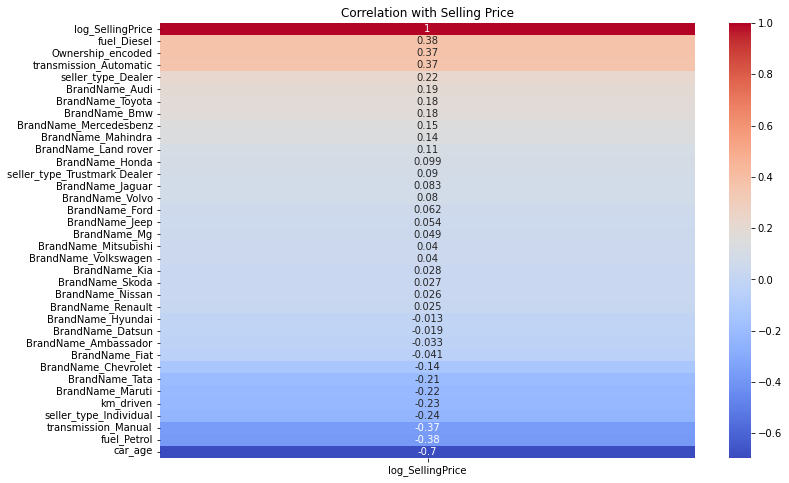

Correlation with Selling Price:
                              log_SellingPrice
log_SellingPrice                      1.000000
fuel_Diesel                           0.376283
Ownership_encoded                     0.370808
transmission_Automatic                0.365725
seller_type_Dealer                    0.223738
BrandName_Audi                        0.194982
BrandName_Toyota                      0.183250
BrandName_Bmw                         0.177822
BrandName_Mercedesbenz                0.152903
BrandName_Mahindra                    0.140826
BrandName_Land rover                  0.108197
BrandName_Honda                       0.098873
seller_type_Trustmark Dealer          0.089756
BrandName_Jaguar                      0.083170
BrandName_Volvo                       0.080060
BrandName_Ford                        0.062471
BrandName_Jeep                        0.053651
BrandName_Mg                          0.049332
BrandName_Mitsubishi                  0.040376
BrandName_Volkswagen        

In [1063]:
# Compute correlation matrix
correlation_matrix = Encoded_no_duplication_V2.corr()

# Plot heatmap of correlations with 'selling_price'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['log_SellingPrice']].sort_values(by='log_SellingPrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Selling Price')
plt.show()


# Extract correlations with 'selling_price'
correlations_with_selling_price = correlation_matrix[['log_SellingPrice']].sort_values(by='log_SellingPrice', ascending=False)

# Print correlation values
print("Correlation with Selling Price:")
print(correlations_with_selling_price)

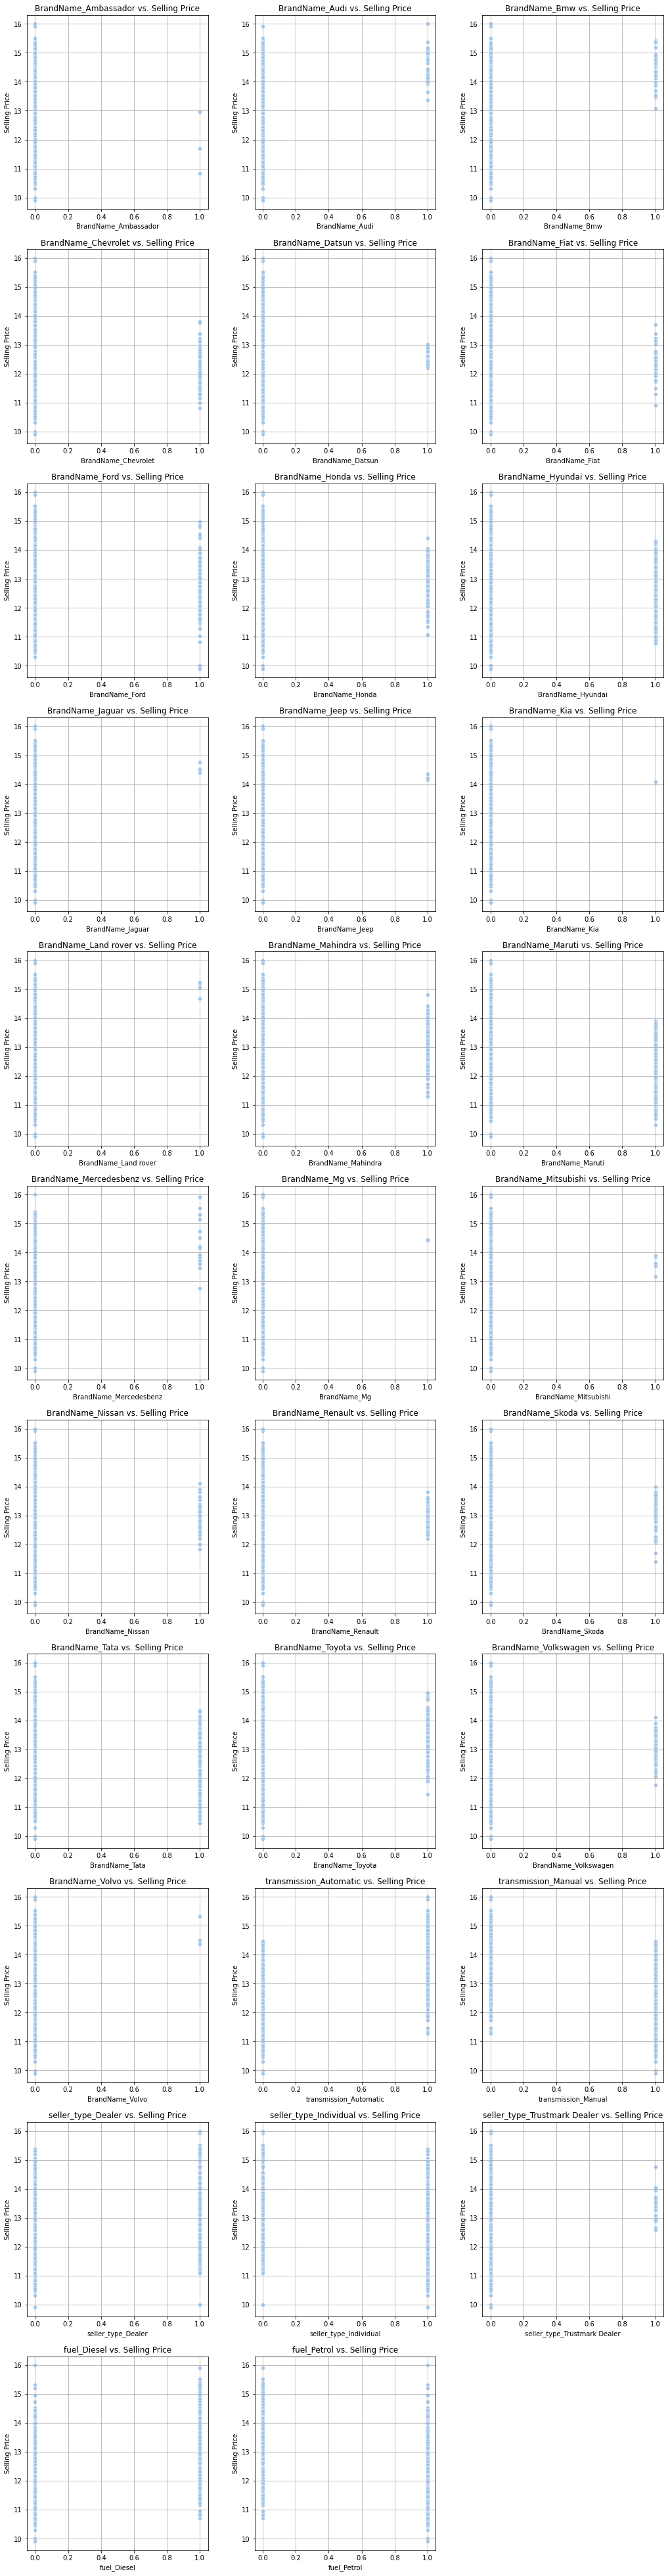

In [1064]:
# Define the number of features to plot
num_features = len(features_after_encoding)

# Determine the number of rows and columns for the subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Number of rows needed

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=4.0)  # Adjust spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against the selling price
for i, feature in enumerate(features_after_encoding):
    sns.scatterplot(data=Encoded_no_duplication_V2, x=feature, y='log_SellingPrice', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Selling Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Selling Price')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

In [1065]:
# Initialize lists to store significant and non-significant features
significant_features = []
non_significant_features = []

# Perform ANOVA for each categorical feature
for feature in features_after_encoding:
    # Group the selling_price by the unique values of the categorical feature
    groups = [Encoded_no_duplication_V2[Encoded_no_duplication_V2[feature] == value]['log_SellingPrice'] 
              for value in Encoded_no_duplication_V2[feature].unique()]
    
    # Perform the ANOVA test
    f_stat, p_value = stats.f_oneway(*groups)
    
    # Check if p-value indicates a significant effect
    if p_value < 0.05:
        significant_features.append(feature)
    else:
        non_significant_features.append(feature)

# Print results
print(f"Total number of significant features: {len(significant_features)}")
print(f"Total number of non-significant features: {len(non_significant_features)}")
print("Significant features:", significant_features)
print("Non-significant features:", non_significant_features)


""" 
Features with high p-values (e.g., fuel_Electric) do not show a significant effect on selling_price.
"""

Total number of significant features: 25
Total number of non-significant features: 7
Significant features: ['BrandName_Audi', 'BrandName_Bmw', 'BrandName_Chevrolet', 'BrandName_Fiat', 'BrandName_Ford', 'BrandName_Honda', 'BrandName_Jaguar', 'BrandName_Jeep', 'BrandName_Land rover', 'BrandName_Mahindra', 'BrandName_Maruti', 'BrandName_Mercedesbenz', 'BrandName_Mg', 'BrandName_Mitsubishi', 'BrandName_Tata', 'BrandName_Toyota', 'BrandName_Volkswagen', 'BrandName_Volvo', 'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_Petrol']
Non-significant features: ['BrandName_Ambassador', 'BrandName_Datsun', 'BrandName_Hyundai', 'BrandName_Kia', 'BrandName_Nissan', 'BrandName_Renault', 'BrandName_Skoda']


' \nFeatures with high p-values (e.g., fuel_Electric) do not show a significant effect on selling_price.\n'

**Summary**

**<span style="color:red">The correlation analysis</span>** provides a basic understanding of how individual features relate to selling price linearly.
The **<span style="color:red">Two-Way ANOVA</span>** reveals more detailed insights into how categorical features and their interactions affect selling price.
**<span style="color:red">One-Way ANOVA</span>** examines the effect of a single categorical feature on the selling price. It helps determine if there are significant differences in the selling price across different levels of this categorical feature. This analysis provides insights into how each individual categorical feature, such as brand or fuel type, impacts the selling price, highlighting which categories have distinct effects.

# <span style="color: green; font-weight: bold;">**5. Dimensionality Reduction**</span>

In [1066]:
Encoded_no_duplication_V2

km_driven  log_SellingPrice  car_age  Ownership_encoded  \
0         70000         11.002117       17                  5   
1         50000         11.813037       17                  5   
2        100000         13.304687       12                  5   
3         46000         12.429220        7                  5   
4        141000         13.017005       10                  3   
...         ...               ...      ...                ...   
3507      80000         12.923912       10                  3   
3508      80000         12.923912       10                  3   
3509      83000         11.608245       15                  3   
3510      90000         13.670486        8                  5   
3511      40000         12.323860        8                  5   

      BrandName_Ambassador  BrandName_Audi  BrandName_Bmw  \
0                        0               0              0   
1                        0               0              0   
2                        0               0              0   
3                        0               0              0   
4                        0               0              0   
...                    ...             ...            ...   
3507                     0               0              0   
3508                     0               0              0   
3509                     0               0              0   
3510                     0               0              0   
3511                     0               0              0   

      BrandName_Chevrolet  BrandName_Datsun  BrandName_Fiat  ...  \
0                       0                 0               0  ...   
1                       0                 0               0  ...   
2                       0                 0               0  ...   
3                       0                 1               0  ...   
4                       0                 0               0  ...   
...                   ...               ...             ...  ...   
3507                    0                 0               0  ...   
3508                    0                 0               0  ...   
3509                    0                 0               0  ...   
3510                    0                 0               0  ...   
3511                    0                 0               0  ...   

      BrandName_Toyota  BrandName_Volkswagen  BrandName_Volvo  \
0                    0                     0                0   
1                    0                     0                0   
2                    0                     0                0   
3                    0                     0                0   
4                    0                     0                0   
...                ...                   ...              ...   
3507                 0                     0                0   
3508                 0                     0                0   
3509                 0                     0                0   
3510                 0                     0                0   
3511                 0                     0                0   

      transmission_Automatic  transmission_Manual  seller_type_Dealer  \
0                          0                    1                   0   
1                          0                    1                   0   
2                          0                    1                   0   
3                          0                    1                   0   
4                          0                    1                   0   
...                      ...                  ...                 ...   
3507                       0                    1                   0   
3508                       0                    1                   0   
3509                       0                    1                   0   
3510                       0                    1                   0   
3511                       0                    1                   0   

      seller_type

In [1067]:
unique_brands = cleaned_data_no_duplication_V1['BrandName'].unique()
print(unique_brands)


['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedesbenz' 'Audi' 'Skoda' 'Jeep' 'Bmw' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land rover' 'Mg'
 'Ambassador' 'Kia']


In [1068]:
column_names = Encoded_no_duplication_V2.columns.tolist()
print(column_names)


['km_driven', 'log_SellingPrice', 'car_age', 'Ownership_encoded', 'BrandName_Ambassador', 'BrandName_Audi', 'BrandName_Bmw', 'BrandName_Chevrolet', 'BrandName_Datsun', 'BrandName_Fiat', 'BrandName_Ford', 'BrandName_Honda', 'BrandName_Hyundai', 'BrandName_Jaguar', 'BrandName_Jeep', 'BrandName_Kia', 'BrandName_Land rover', 'BrandName_Mahindra', 'BrandName_Maruti', 'BrandName_Mercedesbenz', 'BrandName_Mg', 'BrandName_Mitsubishi', 'BrandName_Nissan', 'BrandName_Renault', 'BrandName_Skoda', 'BrandName_Tata', 'BrandName_Toyota', 'BrandName_Volkswagen', 'BrandName_Volvo', 'transmission_Automatic', 'transmission_Manual', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_Petrol']


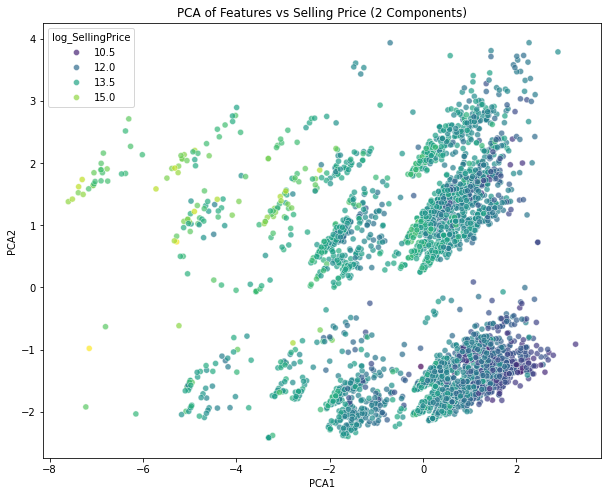

Number of components selected for 2 PCA: 2
Explained variance ratio for 2 PCA: 0.34714983786158626


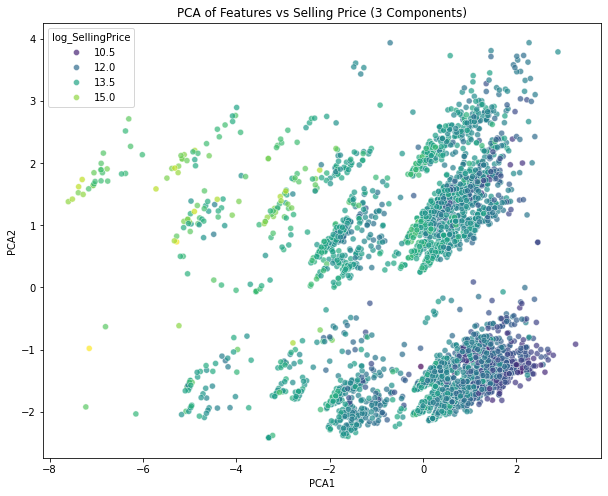

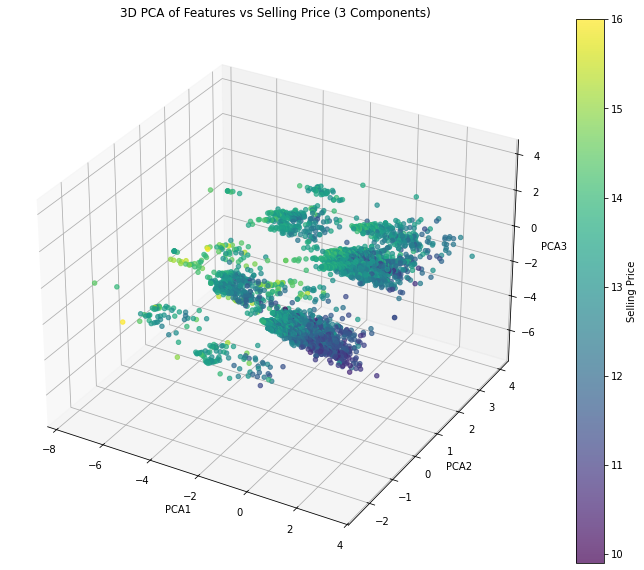

Number of components selected for 3 PCA: 3
Explained variance ratio for 3 PCA: 0.47377227489648865


In [1069]:
# Define the features to keep based on their impact on PC1 and PC2

## this step will help in clustering for perfect customer segmentation

significant_features = [
    'km_driven', 'car_age', 'fuel_Diesel', 'fuel_Petrol' , 'BrandName_Mg',  'Ownership_encoded', 'BrandName_Hyundai', 'BrandName_Mahindra',
    'BrandName_Audi', 'BrandName_Bmw',  'seller_type_Dealer', 'seller_type_Individual', 'transmission_Automatic', 'transmission_Manual' ,'BrandName_Maruti'
]



# [, 'BrandName_Ambassador', 'BrandName_Audi', 'BrandName_Bmw', 'BrandName_Chevrolet', 'BrandName_Datsun', 'BrandName_Fiat', 
# 'BrandName_Ford', 'BrandName_Honda', 'BrandName_Hyundai', 'BrandName_Jaguar', 'BrandName_Jeep', 'BrandName_Kia', 'BrandName_Land rover', 
# 'BrandName_Mahindra', 'BrandName_Maruti', 'BrandName_Mercedesbenz', 'BrandName_Mg', 'BrandName_Mitsubishi', 'BrandName_Nissan', 'BrandName_Renault', 
# 'BrandName_Skoda', 'BrandName_Tata', 'BrandName_Toyota', 'BrandName_Volkswagen', 'BrandName_Volvo', 'seller_type_Dealer', 'seller_type_Individual',
#  'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_Petrol']


# Create a reduced DataFrame with only the significant features
X_reduced = Encoded_no_duplication_V2[significant_features]
X_reduced = pd.concat([X_reduced, Encoded_no_duplication_V2[['log_SellingPrice']]], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced.drop(columns=['log_SellingPrice']))

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Create DataFrame with PCA components and selling_price for 2 components
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PCA1', 'PCA2'])
pca_df_2['log_SellingPrice'] = Encoded_no_duplication_V2['log_SellingPrice']

# Plot PCA results for 2D visualization (PCA1 vs PCA2) for 2 components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_2, x='PCA1', y='PCA2', hue='log_SellingPrice', palette='viridis', alpha=0.7)
plt.title('PCA of Features vs Selling Price (2 Components)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Print the number of components and the amount of variance explained for 2 components
print(f'Number of components selected for 2 PCA: {X_pca_2.shape[1]}')
print(f'Explained variance ratio for 2 PCA: {pca_2.explained_variance_ratio_.sum()}')

# Apply PCA with 3 components on the reduced dataset
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Create DataFrame with PCA components and selling_price for 3 components
pca_df_3 = pd.DataFrame(X_pca_3, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df_3['log_SellingPrice'] = Encoded_no_duplication_V2['log_SellingPrice']

# Plot PCA results for 2D visualization (PCA1 vs PCA2) for 3 components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_3, x='PCA1', y='PCA2', hue='log_SellingPrice', palette='viridis', alpha=0.7)
plt.title('PCA of Features vs Selling Price (3 Components)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Plot PCA results for 3D visualization (PCA1, PCA2, PCA3) for 3 components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df_3['PCA1'], pca_df_3['PCA2'], pca_df_3['PCA3'], c=pca_df_3['log_SellingPrice'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Selling Price')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Features vs Selling Price (3 Components)')
plt.show()

# Print the number of components and the amount of variance explained for 3 components
print(f'Number of components selected for 3 PCA: {X_pca_3.shape[1]}')
print(f'Explained variance ratio for 3 PCA: {pca_3.explained_variance_ratio_.sum()}')

                            PCA1      PCA2
km_driven               0.212027  0.325620
car_age                 0.275335  0.029375
fuel_Diesel            -0.067753  0.589015
fuel_Petrol             0.067753 -0.589015
BrandName_Mg           -0.050997 -0.008724
Ownership_encoded      -0.275746 -0.112234
BrandName_Hyundai      -0.011329 -0.152519
BrandName_Mahindra      0.025510  0.304958
BrandName_Audi         -0.209260  0.055207
BrandName_Bmw          -0.167986  0.072133
seller_type_Dealer     -0.403237 -0.061394
seller_type_Individual  0.407605  0.066698
transmission_Automatic -0.430278  0.040685
transmission_Manual     0.430278 -0.040685
BrandName_Maruti        0.140032 -0.224764


<Figure size 864x432 with 0 Axes>

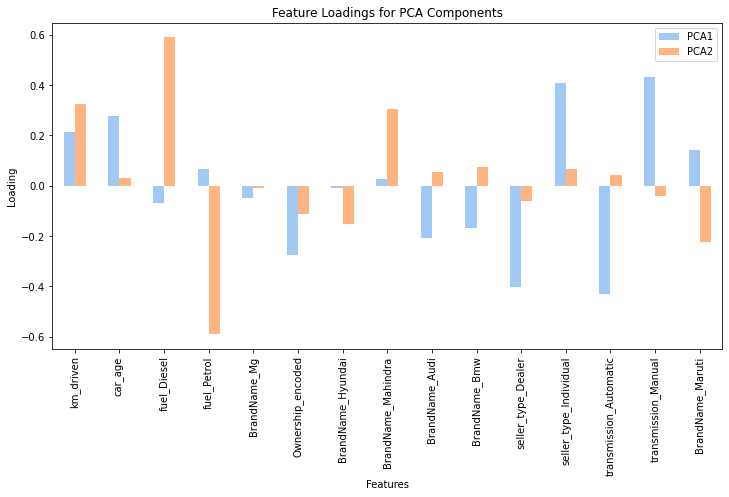

In [1070]:
# Feature Loadings for PCA
pca_features = pd.DataFrame(pca_2.components_.T, columns=['PCA1', 'PCA2'], index=X_reduced.drop(columns=['log_SellingPrice']).columns)
print(pca_features)

# Plot feature loadings
plt.figure(figsize=(12, 6))
pca_features[['PCA1', 'PCA2']].plot(kind='bar', figsize=(12, 6))
plt.title('Feature Loadings for PCA Components')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.show()


### **Before enhaning the data using feature engineering:**

    - Number of components selected: 3
    - Explained variance ratio: 0.7971467390241097

### **After enhaning the data using feature engineering:**

    - Number of components selected: 2
    - Explained variance ratio: 0.9999999992338406


### **Benefits**

Dimensionality Reduction:

    Efficiency: Reducing the number of dimensions to just two while retaining almost all the variance simplifies the data, making it computationally more efficient for clustering and classification.

    Visualization: Two components allow easy visualization of the data, which can be useful for understanding patterns and clusters.

Clustering:

    Enhanced Performance: The high explained variance suggests that the two principal components capture the essential structure of the data. This can improve clustering algorithms by focusing on the most informative aspects of the data.

    Reduced Noise: By reducing dimensionality, you may also reduce noise and redundant features that could negatively impact clustering performance.

Classification:

    Better Classification: With most of the variance captured, the classification model can focus on the most relevant features, potentially improving its performance.

    Faster Training: Fewer dimensions mean the model will train faster and be less prone to overfitting, especially if the data was high-dimensional to start with.

### **Potential Concerns**

    Information Loss: Although the explained variance is extremely high, there might still be some information not captured by the two components. However, with such a high explained variance ratio, this is likely minimal.

    Model Overfitting: While PCA helps in reducing dimensionality and potentially overfitting, ensure that your clustering and classification models are appropriately tuned and validated to avoid overfitting.

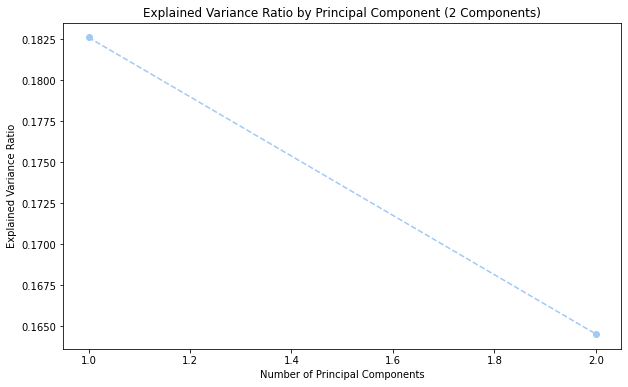

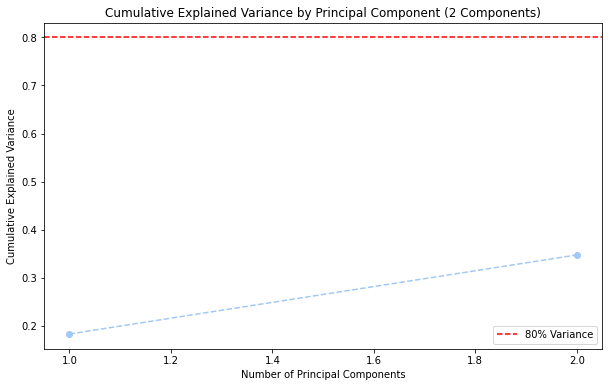

PCA Component Loadings (2 Components):
                             PC1       PC2
km_driven               0.212027  0.325620
car_age                 0.275335  0.029375
fuel_Diesel            -0.067753  0.589015
fuel_Petrol             0.067753 -0.589015
BrandName_Mg           -0.050997 -0.008724
Ownership_encoded      -0.275746 -0.112234
BrandName_Hyundai      -0.011329 -0.152519
BrandName_Mahindra      0.025510  0.304958
BrandName_Audi         -0.209260  0.055207
BrandName_Bmw          -0.167986  0.072133
seller_type_Dealer     -0.403237 -0.061394
seller_type_Individual  0.407605  0.066698
transmission_Automatic -0.430278  0.040685
transmission_Manual     0.430278 -0.040685
BrandName_Maruti        0.140032 -0.224764


In [1071]:
# Plot the explained variance ratio of each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_2.explained_variance_ratio_) + 1), 
         pca_2.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component (2 Components)')
plt.show()



# Plot cumulative explained variance for 2 components
cumulative_variance = pca_2.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component (2 Components)')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
plt.legend()
plt.show()



# Define the correct feature names based on significant features
feature_names = X_reduced.drop(columns=['log_SellingPrice']).columns

# Print PCA component loadings for 2 components
DiRed_Encoded_no_duplication_V3 = pd.DataFrame(
    pca_2.components_.T,  # Transpose to match feature names to components
    columns=[f'PC{i+1}' for i in range(X_pca_2.shape[1])],  # Use PC names as columns
    index=feature_names  # Use actual feature names
)
print('PCA Component Loadings (2 Components):')
print(DiRed_Encoded_no_duplication_V3)



Let's break down the benefits and relevance of evaluating a linear regression model with PCA components, especially when you're planning to use clustering and classification next.

## **Benefits of Evaluating a Linear Regression Model with PCA Components**

### 1. Dimensionality Reduction Impact:
- **Purpose:** PCA reduces the number of features in your dataset by creating principal components that capture the most variance. Evaluating a regression model with these components helps you understand how well the reduced feature set explains the target variable.
- **Benefit:** It verifies whether the principal components retain enough information for predicting the target variable (e.g., selling price). If the model performs well, it suggests that the reduced dimensionality still captures significant relationships between features and the target.

### 2. Model Performance Insight:
- **Purpose:** Using `cross_val_score` with the R² metric helps assess the model's performance across different subsets of the data. It measures how well the model predicts the target variable compared to the mean of the target.
- **Benefit:** Cross-validation provides a robust estimate of the model's performance and helps in understanding its generalization capability. A high R² score indicates that the model explains a substantial portion of the variance in the target variable.

### 3. Visualization of Predictions:
- **Purpose:** The scatter plot of true vs. predicted values shows how accurately the model's predictions align with the actual values.
- **Benefit:** This visualization helps in diagnosing the model's performance. Points close to the red dashed line (which represents perfect predictions) indicate that the model is making accurate predictions. Discrepancies may highlight areas where the model needs improvement.

## Relevance to Clustering and Classification

Even though your immediate next steps involve clustering and classification, evaluating regression models with PCA components has the following implications:

### 1. Understanding Feature Importance:
- **Purpose:** Regression analysis with PCA components provides insight into the importance of different features or principal components.
- **Benefit:** This understanding can inform feature selection or weighting strategies for clustering and classification, ensuring that the most relevant features are considered.

### 2. Data Quality and Preparation:
- **Purpose:** Evaluating regression models ensures that the dimensionality reduction process (PCA) is effective and that the data quality is maintained.
- **Benefit:** High-quality, well-prepared data leads to better performance in clustering and classification tasks. If PCA components are effective for regression, it is likely they will also be useful for other tasks.

### 3. Baseline Comparison:
- **Purpose:** By evaluating a regression model, you establish a baseline performance with PCA components.
- **Benefit:** This baseline can be used to compare with the performance of clustering and classification models. If the regression model shows satisfactory performance with PCA, it sets a benchmark for how well other models should perform.

## Summary

Evaluating a linear regression model with PCA components provides a comprehensive view of how well the reduced features explain the target variable. It offers insights into feature importance, model performance, and data quality. This understanding can guide the application of clustering and classification techniques, ensuring that dimensionality reduction effectively supports subsequent analysis steps.


Cross-validated R^2 scores: [0.48136894 0.44866489 0.3891341  0.38249914 0.44354236]
Mean R^2 score: 0.4290418865086941


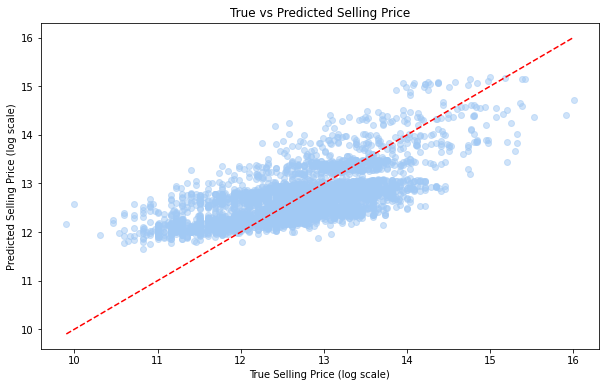

In [1072]:
# Separate features and target variable
X_cleaned_pca = pca_df_2[['PCA1', 'PCA2']]  # Use the 2 PCA components
y_cleaned = pca_df_2['log_SellingPrice']     # Target variable

# Initialize the model
model = LinearRegression()

# Fit the model with PCA components
model.fit(X_cleaned_pca, y_cleaned)

# Cross-validation for model evaluation (R^2 score)
scores = cross_val_score(model, X_cleaned_pca, y_cleaned, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {scores}')
print(f'Mean R^2 score: {np.mean(scores)}')

# Predictions from the model
predictions = model.predict(X_cleaned_pca)

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_cleaned, predictions, alpha=0.5)
plt.xlabel('True Selling Price (log scale)')
plt.ylabel('Predicted Selling Price (log scale)')
plt.title('True vs Predicted Selling Price')
plt.plot([min(y_cleaned), max(y_cleaned)], [min(y_cleaned), max(y_cleaned)], color='red', linestyle='--')  # Identity line
plt.show()


    - it will not be used for regression but to gain some insights about the effect of PCA after redcution the model from 3d space to 2d space

In [1073]:
# Convert PCA components to a DataFrame
pca_encoded_no_duplication_V3 = pd.DataFrame(X_cleaned_pca, columns=[f'PCA{i+1}' for i in range(X_cleaned_pca.shape[1])])

# Optionally, add the target variable to the DataFrame
pca_encoded_no_duplication_V3['log_SellingPrice'] = y_cleaned.values

# Save the DataFrame to a CSV file for further use
pca_encoded_no_duplication_V3.to_csv('pca_encoded_no_duplication_V3.csv', index=False)

# Display the first few rows of the DataFrame
pca_encoded_no_duplication_V3.head()

# Display the entire DataFrame if needed
pca_encoded_no_duplication_V3

PCA1      PCA2  log_SellingPrice
0     1.272710 -1.582562         11.002117
1     1.183965 -1.718852         11.813037
2     0.473125  1.037635         13.304687
3     0.209787 -1.321935         12.429220
4     0.998412  1.883450         13.017005
...        ...       ...               ...
3507  0.698047  1.067997         12.923912
3508  0.698047  1.067997         12.923912
3509  1.644062 -1.327321         11.608245
3510  0.169144  0.941793         13.670486
3511  0.248066 -1.355897         12.323860

[3512 rows x 3 columns]

# <span style="color: #33FFF8; font-weight: bold;">**6. Clustering**</span>

In [1074]:
pca_encoded_no_duplication_V3

PCA1      PCA2  log_SellingPrice
0     1.272710 -1.582562         11.002117
1     1.183965 -1.718852         11.813037
2     0.473125  1.037635         13.304687
3     0.209787 -1.321935         12.429220
4     0.998412  1.883450         13.017005
...        ...       ...               ...
3507  0.698047  1.067997         12.923912
3508  0.698047  1.067997         12.923912
3509  1.644062 -1.327321         11.608245
3510  0.169144  0.941793         13.670486
3511  0.248066 -1.355897         12.323860

[3512 rows x 3 columns]

In [1075]:
# Extract PCA components
X_pca = pca_encoded_no_duplication_V3[['PCA1', 'PCA2']].values  # PCA components for 2D clustering


In [1076]:
X_pca

array([[ 1.27271024, -1.58256178],
       [ 1.18396517, -1.71885189],
       [ 0.4731246 ,  1.03763498],
       ...,
       [ 1.64406152, -1.32732069],
       [ 0.16914413,  0.94179302],
       [ 0.24806554, -1.35589741]])

In [1077]:
# Ensure X_pca is a NumPy array for plotting
def plot_kmeans_clusters(X_pca, n_clusters):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='K-Means Cluster Label')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return kmeans_labels

# Ensure X_pca is a NumPy array for plotting
def plot_dbscan_clusters(X_pca, eps, min_samples):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='DBSCAN Cluster Label')
    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return dbscan_labels

# Ensure X_pca is a NumPy array for plotting
def plot_gmm_clusters(X_pca, n_components):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='GMM Cluster Label')
    plt.title(f'GMM Clustering with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return gmm_labels

# Ensure X_pca is a NumPy array for plotting
def plot_hierarchical_clusters(X_pca, n_clusters, linkage_method='ward'):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    hierarchical_labels = hierarchical.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='Hierarchical Cluster Label')
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters (Linkage: {linkage_method})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return hierarchical_labels

# Ensure X_pca is a NumPy array for plotting
def plot_elbow_method(X_pca, max_clusters):
    sse = []
    silhouette_scores = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_pca)
        sse.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    plt.show()

# Ensure X_pca is a NumPy array for plotting
def plot_dendrogram(X_pca, method='ward'):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    plt.figure(figsize=(12, 8))
    linkage_matrix = sch.linkage(X_pca, method=method)
    sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=50)
    plt.title(f'Dendrogram (Linkage Method: {method})')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Ensure X_pca is a NumPy array for plotting
def plot_gmm_bic_aic(X_pca, max_components):
    bic = []
    aic = []
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        aic.append(gmm.aic(X_pca))
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_components + 1), bic, marker='o')
    plt.title('BIC for GMM')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_components + 1), aic, marker='o')
    plt.title('AIC for GMM')
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    
    plt.show()

# Ensure X_pca is a NumPy array for metrics
def calculate_clustering_metrics(X_pca, labels):
    X_pca = np.array(X_pca)  # Convert DataFrame to NumPy array if necessary
    db_index = davies_bouldin_score(X_pca, labels)
    ch_index = calinski_harabasz_score(X_pca, labels)
    silhouette_avg = silhouette_score(X_pca, labels) if len(set(labels)) > 1 else np.nan
    return db_index, ch_index, silhouette_avg

# Function to evaluate clustering
def evaluate_clustering(X_pca, labels, method_name):
    if labels is not None:
        db_index, ch_index, silhouette_avg = calculate_clustering_metrics(X_pca, labels)
        print(f"{method_name} - Davies-Bouldin Index: {db_index}, Calinski-Harabasz Index: {ch_index}, Silhouette Score: {silhouette_avg}")
    else:
        print(f"{method_name} - Clustering labels are None. Skipping evaluation.")

# Function to optimize DBSCAN
def optimize_dbscan(data, eps_values, min_samples_values):
    data = np.array(data)  # Convert DataFrame to NumPy array if necessary
    best_eps = None
    best_min_samples = None
    best_score = -1
    best_model = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan_model.fit_predict(data)

            # Filter out noise points (-1) for silhouette scoring
            if len(np.unique(clusters)) > 1:
                score = silhouette_score(data, clusters)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_model = dbscan_model

    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")
    return best_model


Processing K-Means with 2 clusters:


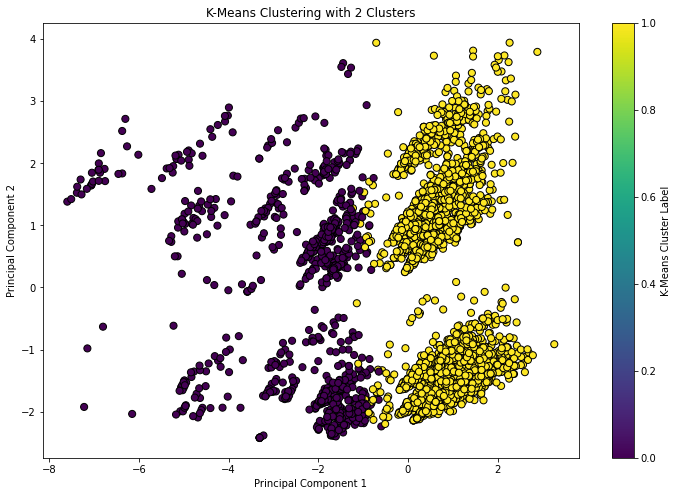


Processing K-Means with 3 clusters:


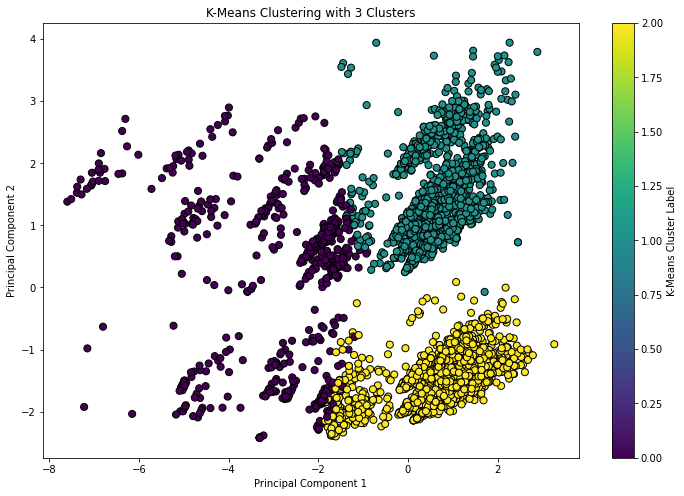


Processing K-Means with 4 clusters:


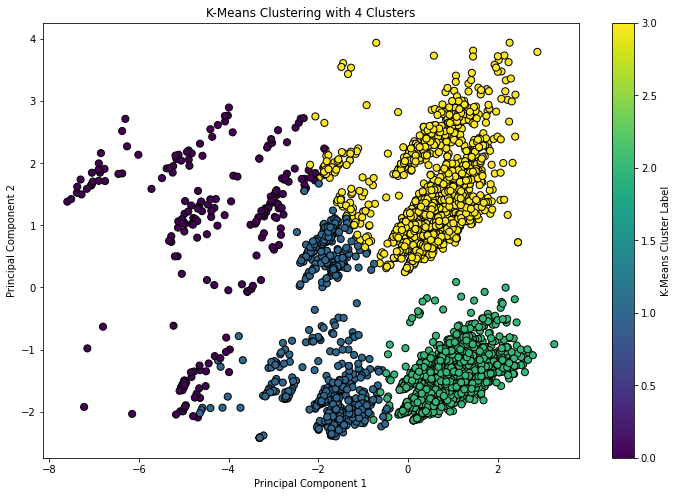


Processing K-Means with 5 clusters:


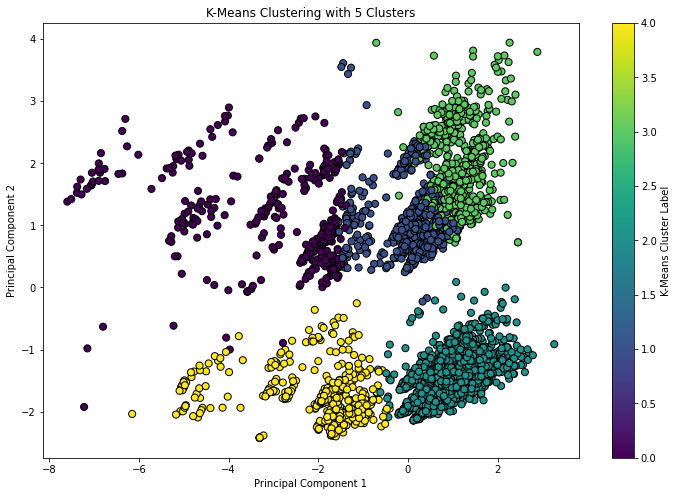


Processing K-Means with 6 clusters:


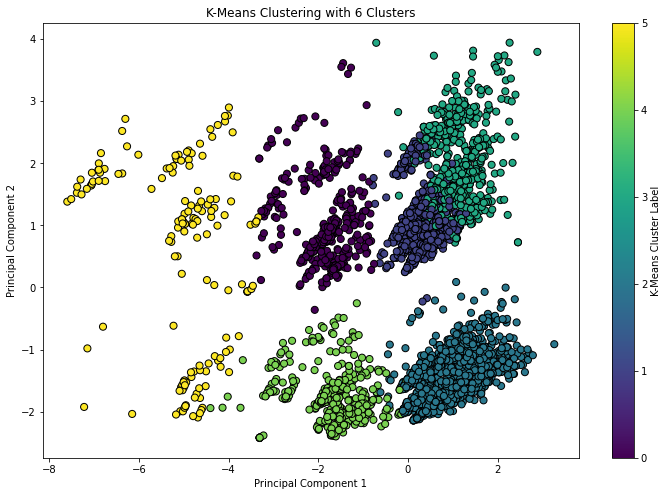


Processing K-Means with 7 clusters:


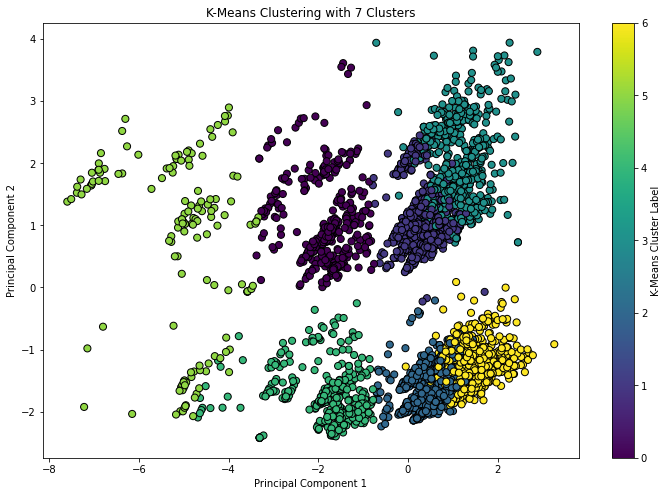


Processing K-Means with 8 clusters:


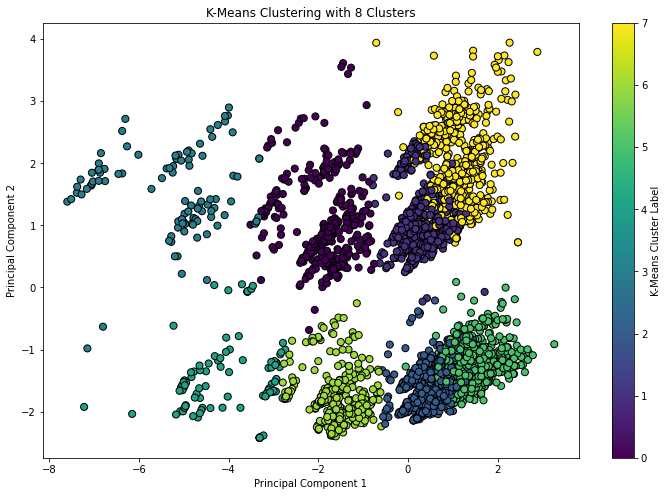


Processing K-Means with 9 clusters:


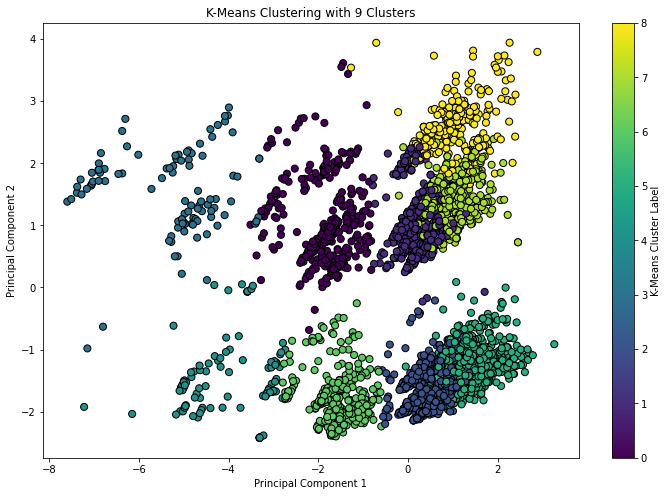


Processing K-Means with 10 clusters:


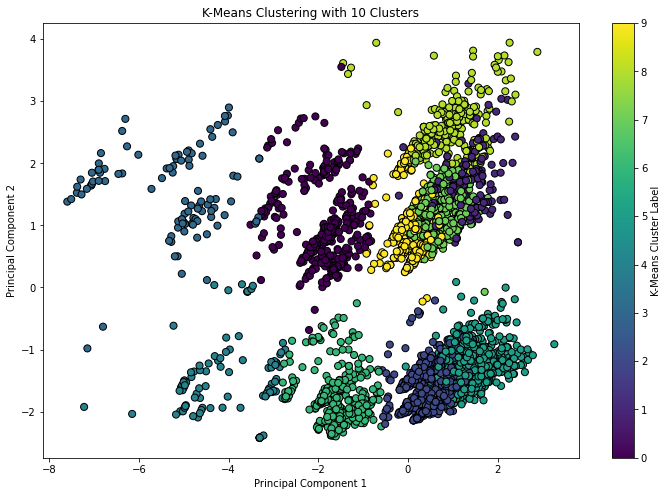


Processing K-Means with 11 clusters:


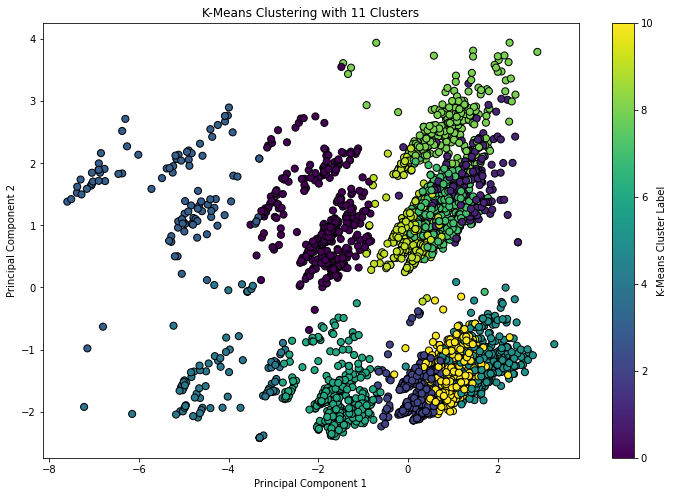


Processing K-Means with 12 clusters:


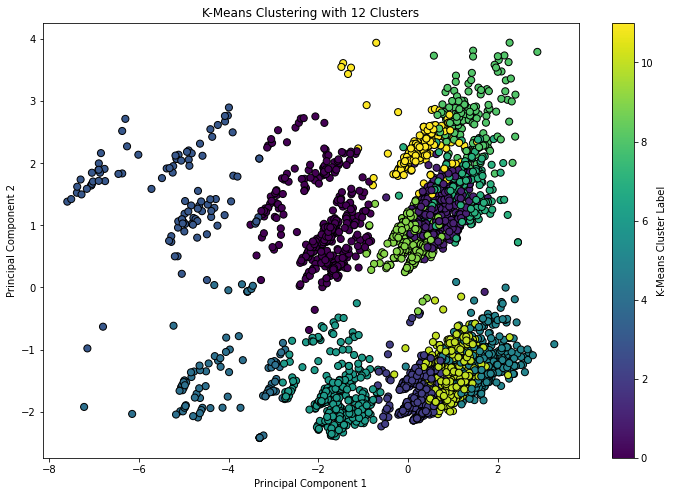


Processing Hierarchical Clustering with 2 clusters and linkage method 'ward':


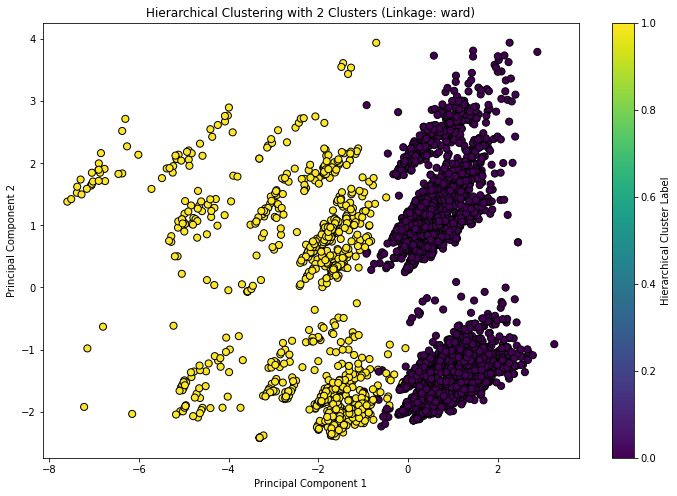


Processing Hierarchical Clustering with 3 clusters and linkage method 'ward':


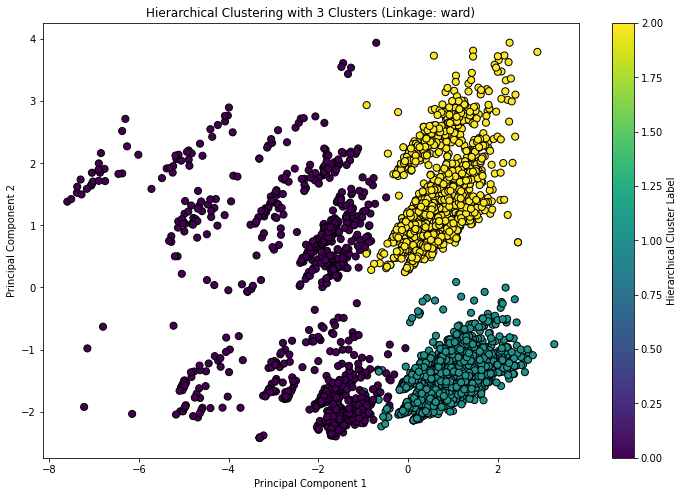


Processing Hierarchical Clustering with 4 clusters and linkage method 'ward':


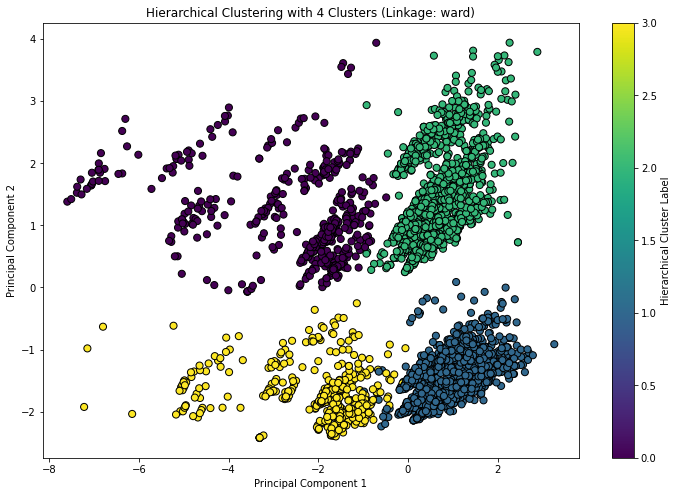


Processing Hierarchical Clustering with 5 clusters and linkage method 'ward':


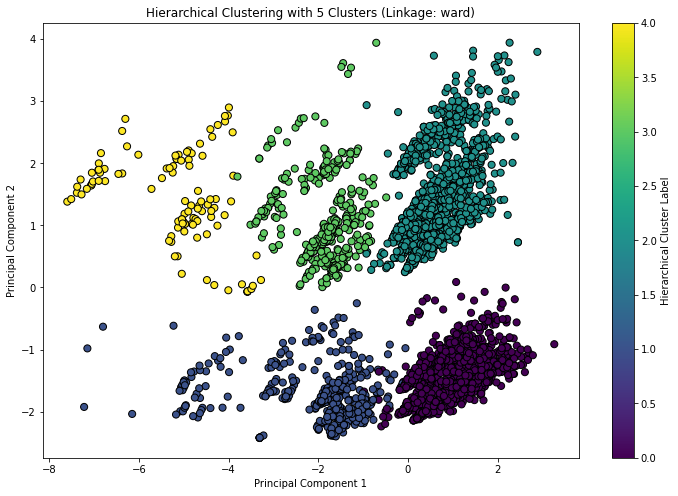


Processing Hierarchical Clustering with 6 clusters and linkage method 'ward':


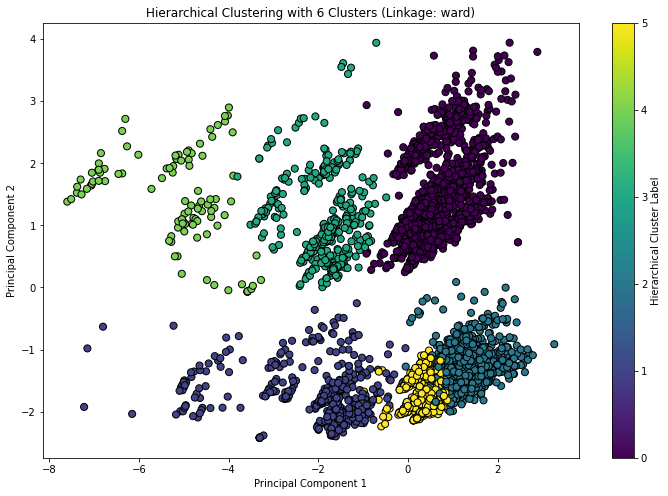


Processing Hierarchical Clustering with 7 clusters and linkage method 'ward':


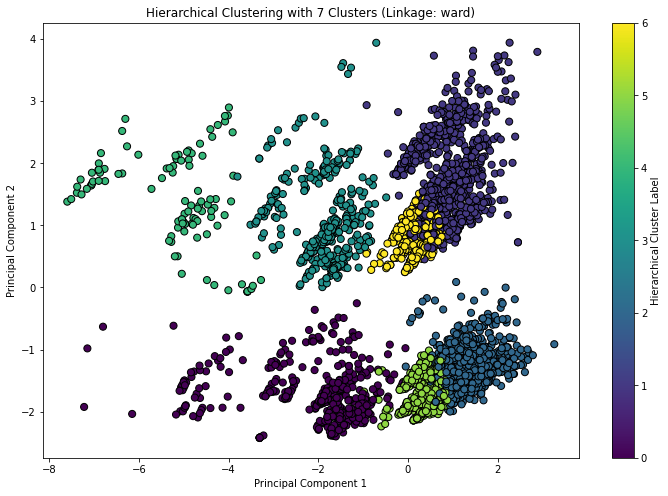


Processing GMM with 2 components:


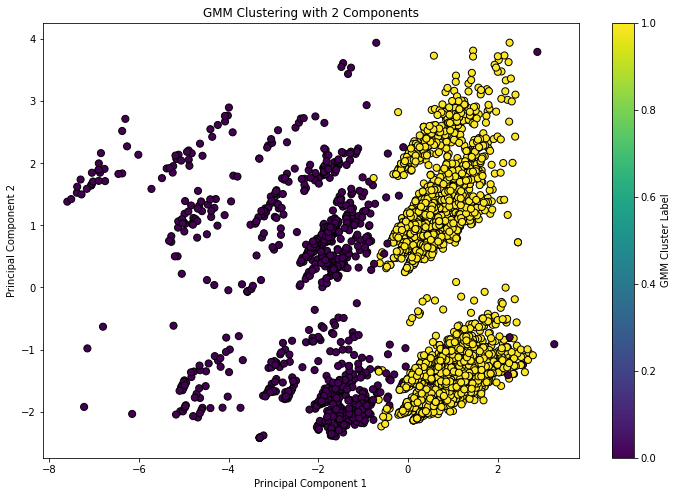


Processing GMM with 3 components:


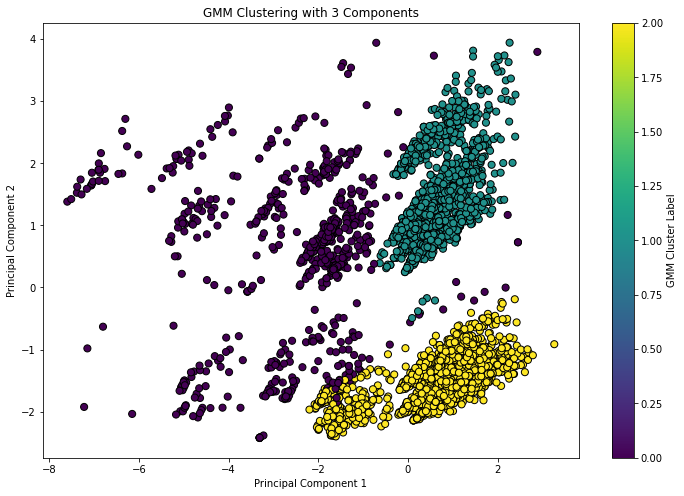


Processing GMM with 4 components:


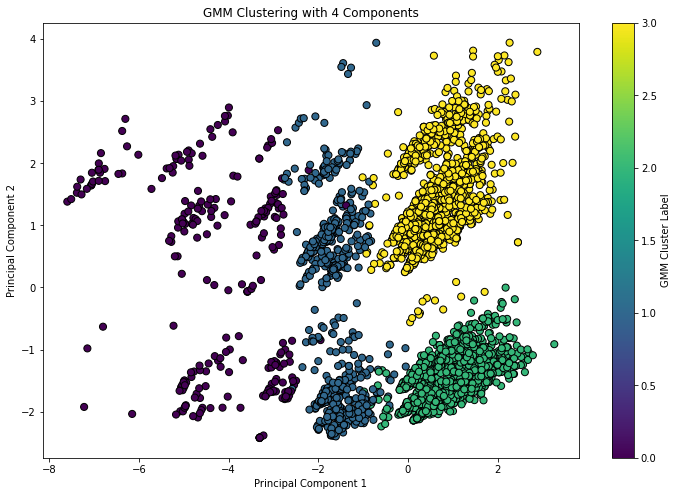


Processing GMM with 5 components:


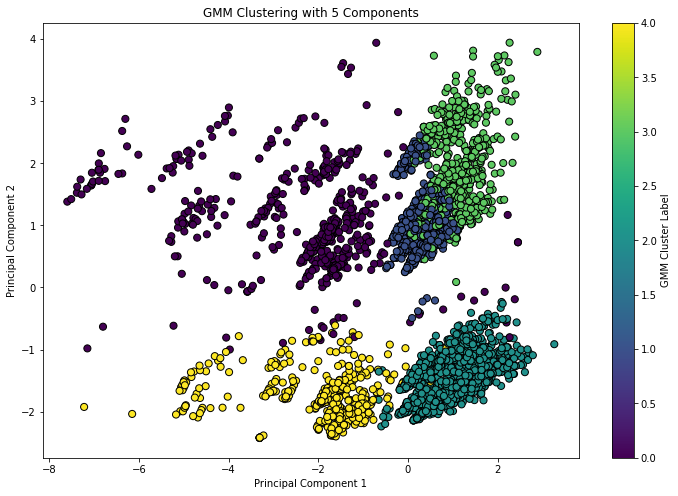


Processing GMM with 6 components:


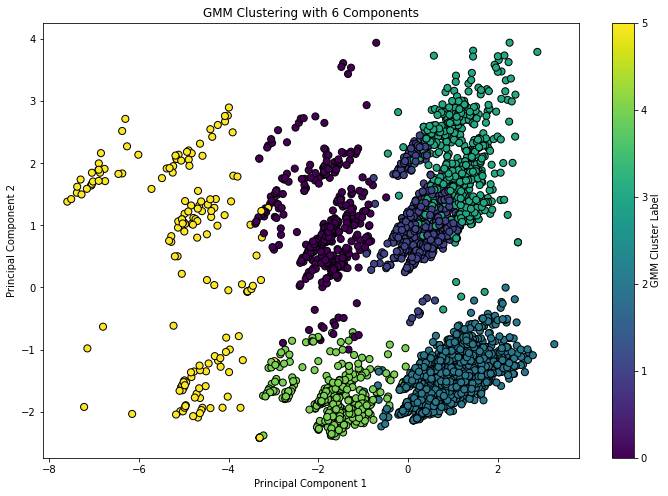


Processing GMM with 7 components:


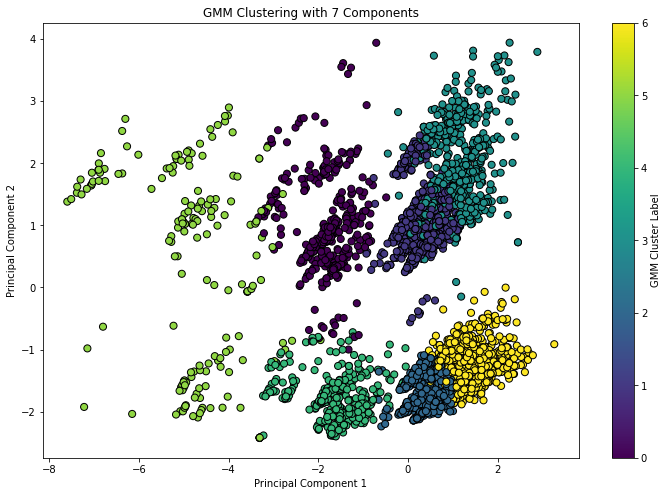

In [1089]:
# Initialize lists to store metrics
results = []

# Plot and compute metrics for K-Means
for n in [2, 3, 4, 5, 6 , 7, 8,  9, 10, 11, 12]:
    print(f"\nProcessing K-Means with {n} clusters:")
    kmeans_labels = plot_kmeans_clusters(pca_encoded_no_duplication_V3, n)
    if kmeans_labels is not None:
        db_index, ch_index, _ = calculate_clustering_metrics(pca_encoded_no_duplication_V3, kmeans_labels)
        results.append({
            'Method': 'K-Means',
            'Clusters': n,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Index': ch_index
        })

# Plot and compute metrics for Hierarchical Clustering 'complete', 'average', 'ward',  'single'
for n in [2, 3, 4, 5, 6 , 7]:
    for method in ['ward']:
        print(f"\nProcessing Hierarchical Clustering with {n} clusters and linkage method '{method}':")
        hierarchical_labels = plot_hierarchical_clusters(pca_encoded_no_duplication_V3, n, method)
        if hierarchical_labels is not None:
            db_index, ch_index, _ = calculate_clustering_metrics(pca_encoded_no_duplication_V3, hierarchical_labels)
            results.append({
                'Method': 'Hierarchical',
                'Clusters': n,
                'Linkage': method,
                'Davies-Bouldin Index': db_index,
                'Calinski-Harabasz Index': ch_index
            })

# Plot and compute metrics for GMM
for n in [2, 3, 4, 5 , 6 , 7 ]:
    print(f"\nProcessing GMM with {n} components:")
    gmm_labels = plot_gmm_clusters(pca_encoded_no_duplication_V3, n)
    if gmm_labels is not None:
        db_index, ch_index, _ = calculate_clustering_metrics(pca_encoded_no_duplication_V3, gmm_labels)
        results.append({
            'Method': 'GMM',
            'Components': n,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Index': ch_index
        })



In [1090]:
# Optimize and plot DBSCAN
print("\nOptimizing DBSCAN:")
eps_values = np.linspace(0.1, 1, 20)
min_samples_values = range(1, 12)
best_dbscan = optimize_dbscan(pca_encoded_no_duplication_V3, eps_values, min_samples_values)


Optimizing DBSCAN:
Best eps: 0.8578947368421053, Best min_samples: 6, Best silhouette score: 0.46987171644379744



Clustering Results:
          Method  Clusters  Davies-Bouldin Index  Calinski-Harabasz Index  \
0        K-Means       2.0              1.154925              1837.953637   
1        K-Means       3.0              0.790739              3235.999771   
2        K-Means       4.0              0.895103              3022.554771   
3        K-Means       5.0              0.974664              2813.996798   
4        K-Means       6.0              0.894082              3016.024634   
5        K-Means       7.0              0.890020              3340.092142   
6        K-Means       8.0              0.863487              3350.078123   
7        K-Means       9.0              0.876823              3289.597273   
8        K-Means      10.0              0.904267              3109.613808   
9        K-Means      11.0              0.958470              3037.506221   
10       K-Means      12.0              0.936302              2961.247102   
11  Hierarchical       2.0              1.182714       

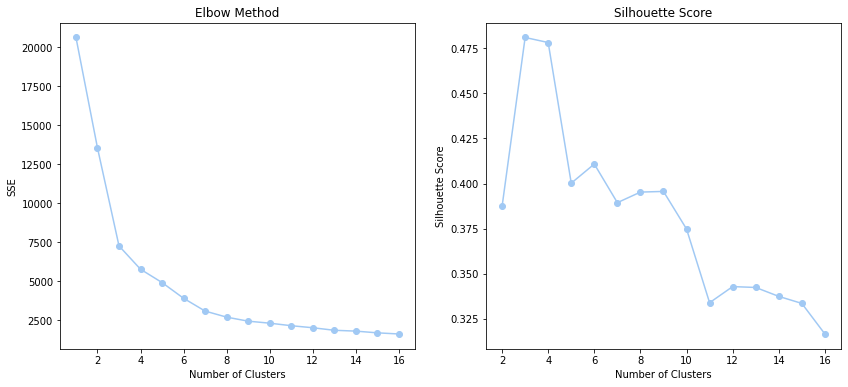

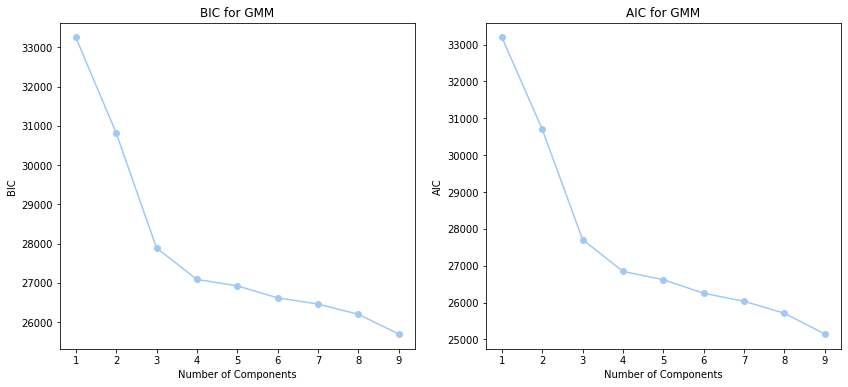

In [1091]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Fill NaN values in 'Linkage' and 'Components' columns with appropriate labels
results_df['Linkage'] = results_df['Linkage'].fillna('N/A')
results_df['Components'] = results_df['Components'].fillna('N/A')

# Print final results
print("\nClustering Results:")
print(results_df)

# Ensure X_cleaned_pca is a NumPy array for plotting
X_cleaned_pca_array = np.array(pca_encoded_no_duplication_V3)

# Plot Elbow Method and Silhouette Score for K-Means
plot_elbow_method(X_cleaned_pca_array, max_clusters=16)

# Plot BIC and AIC for GMM
plot_gmm_bic_aic(X_cleaned_pca_array, max_components=9)

GMM Clustering Results:
      Index  GMM Cluster
0         0            2
1         1            2
2         2            1
3         3            2
4         4            1
...     ...          ...
3507   3507            1
3508   3508            1
3509   3509            2
3510   3510            1
3511   3511            2

[3512 rows x 2 columns]

DBSCAN Clustering Results:
      Index  DBSCAN Cluster
0         0               0
1         1               0
2         2               0
3         3               0
4         4               0
...     ...             ...
3507   3507               0
3508   3508               0
3509   3509               0
3510   3510               0
3511   3511               0

[3512 rows x 2 columns]

Silhouette Score for DBSCAN:
0.2952866450253225


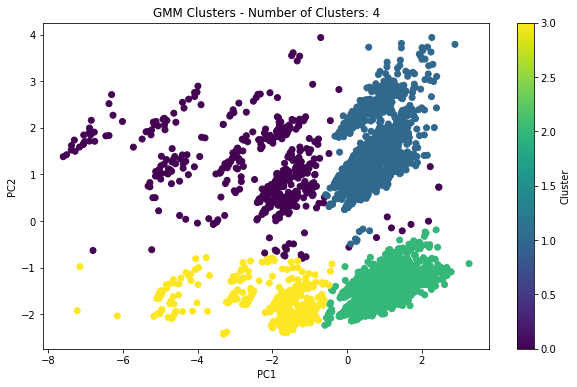

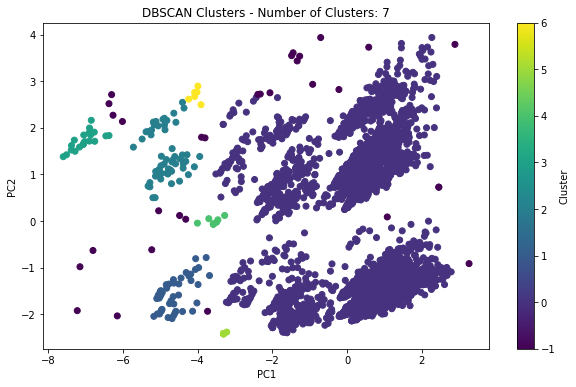

In [1095]:
# Ensure X_cleaned_pca is a NumPy array
X_cleaned_pca = np.array(X_cleaned_pca)  # Convert to NumPy array if needed

# Apply GMM with optimal number of clusters
optimal_gmm_n_components = 4
gmm = GaussianMixture(n_components=optimal_gmm_n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_cleaned_pca)

# Optimizing DBSCAN:
# Best eps: 0.8578947368421053, Best min_samples: 6, Best silhouette score: 0.46987171644379744

# Apply DBSCAN with the best parameters
eps = 0.46
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_cleaned_pca)

# Calculate silhouette score for DBSCAN
silhouette_avg = silhouette_score(X_cleaned_pca, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'Undefined (single cluster)'

# Calculate the number of clusters
n_clusters_gmm = optimal_gmm_n_components
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Subtract 1 if there are outliers

# Display clustering results
print("GMM Clustering Results:")
print(pd.DataFrame({'Index': range(len(gmm_labels)), 'GMM Cluster': gmm_labels}))

print("\nDBSCAN Clustering Results:")
print(pd.DataFrame({'Index': range(len(dbscan_labels)), 'DBSCAN Cluster': dbscan_labels}))

print("\nSilhouette Score for DBSCAN:")
print(silhouette_avg)

# Function to plot clusters
def plot_clusters(X, labels, title, num_clusters):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'{title} - Number of Clusters: {num_clusters}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot GMM clusters
plot_clusters(X_cleaned_pca, gmm_labels, 'GMM Clusters', n_clusters_gmm)

# Plot DBSCAN clusters
plot_clusters(X_cleaned_pca, dbscan_labels, 'DBSCAN Clusters', n_clusters_dbscan)

In [1096]:
results_df.to_csv('clustering_results.csv', index=False)

### **Comparison with Other Algorithms**

### K-Means

- **Strengths**: 
  - Efficient and straightforward for spherical clusters.
- **Weaknesses**: 
  - Assumes clusters are spherical and equally sized.
  - Requires specifying the number of clusters in advance.

### Hierarchical Clustering

- **Strengths**: 
  - Does not require specifying the number of clusters in advance.
  - Can be insightful with dendrograms.
- **Weaknesses**: 
  - Can be computationally expensive, especially with large datasets.

### Gaussian Mixture Model (GMM)

- **Strengths**: 
  - Flexible with cluster shapes.
  - Can model elliptical clusters.
- **Weaknesses**: 
  - Requires specifying the number of components.
  - Can be complex to tune.

### DBSCAN

- **Strengths**: 
  - Finds arbitrarily shaped clusters.
  - Handles noise effectively.
- **Weaknesses**: 
  - Sensitive to parameter settings.
  - Can struggle with clusters of varying densities.



## **Clustering Analysis Summary**

### Clustering Results

#### K-Means Clustering Results

- **Number of Clusters (K-Means):** The number of clusters is determined by the `n_clusters` parameter. The following metrics were evaluated for different numbers of clusters:

| Method     | Clusters | Davies-Bouldin Index | Calinski-Harabasz Index |
|------------|----------|----------------------|--------------------------|
| K-Means    | 2        | 0.6255               | 4272.50                  |
| K-Means    | 3        | 0.6485               | 4438.49                  |
| K-Means    | 4        | 0.5381               | 5690.67                  |
| K-Means    | 5        | 0.4806               | 6436.24                  |

- **Interpretation:** 
  - **Davies-Bouldin Index:** Lower values indicate better clustering. For K-Means, the lowest DBI is at 5 clusters (0.4806), suggesting that 5 clusters may offer the best clustering solution based on this index.
  - **Calinski-Harabasz Index:** Higher values indicate better clustering. For K-Means, the highest CHI is at 5 clusters (6436.24), indicating that 5 clusters might be optimal according to this metric.

#### Hierarchical Clustering Results

- **Number of Clusters (Hierarchical):** The following metrics were evaluated for different linkage methods:

| Method        | Clusters | Davies-Bouldin Index | Calinski-Harabasz Index | Linkage   |
|---------------|----------|----------------------|--------------------------|-----------|
| Hierarchical  | 2        | 0.6072               | 2652.90                  | ward      |
| Hierarchical  | 2        | 0.4412               | 480.57                   | complete  |
| Hierarchical  | 2        | 0.2561               | 367.08                   | average   |
| Hierarchical  | 2        | 0.0464               | 257.19                   | single    |
| Hierarchical  | 3        | 0.5623               | 4412.91                  | ward      |
| Hierarchical  | 3        | 0.2468               | 279.82                   | complete  |
| Hierarchical  | 3        | 0.0616               | 191.68                   | average   |
| Hierarchical  | 3        | 0.0616               | 191.68                   | single    |
| Hierarchical  | 4        | 0.5889               | 4959.17                  | ward      |
| Hierarchical  | 4        | 0.3800               | 715.55                   | complete  |
| Hierarchical  | 4        | 0.2153               | 498.11                   | average   |
| Hierarchical  | 4        | 0.0801               | 147.81                   | single    |
| Hierarchical  | 5        | 0.5205               | 5900.27                  | ward      |
| Hierarchical  | 5        | 0.2377               | 545.46                   | complete  |
| Hierarchical  | 5        | 0.2050               | 378.03                   | average   |
| Hierarchical  | 5        | 0.0932               | 144.78                   | single    |

- **Interpretation:**
  - **Davies-Bouldin Index:** Lower values are better. The lowest DBI for Hierarchical clustering is for `single` linkage with 2 clusters (0.0464).
  - **Calinski-Harabasz Index:** Higher values are better. The highest CHI is for `ward` linkage with 5 clusters (5900.27), suggesting that this might be a good choice.

#### GMM Clustering Results

- **Number of Clusters (GMM):** The number of clusters varies based on the number of components used in the GMM model. The following metrics were evaluated:

| Method | Davies-Bouldin Index | Calinski-Harabasz Index | Components |
|--------|----------------------|--------------------------|------------|
| GMM    | 1.1060               | 1572.91                  | 2          |
| GMM    | 1.2376               | 1537.81                  | 3          |
| GMM    | 2.6971               | 1706.76                  | 4          |
| GMM    | 1.3945               | 1138.73                  | 5          |

- **Interpretation:**
  - **Davies-Bouldin Index:** Lower values are better. The lowest DBI for GMM is for `2` components (1.1060).
  - **Calinski-Harabasz Index:** Higher values are better. The highest CHI is for `4` components (1706.76), suggesting that 4 components might be ideal.

#### DBSCAN Clustering Results

- **Number of Clusters (DBSCAN):**
  - The number of clusters can be derived from unique cluster labels. Note that `-1` represents noise points or outliers.

- **Silhouette Score:**
  - **Score:** 0.8104
  - A silhouette score close to 1 indicates well-separated clusters and good clustering quality.

### Recommendations

#### K-Means Clustering

- **Trade-offs:**
  - Best suited for data where clusters are spherical and equally sized.
  
- **Selection:**
  - Based on the Davies-Bouldin Index and Calinski-Harabasz Index, 5 clusters seem optimal.

#### Hierarchical Clustering

- **Trade-offs:**
  - Good for understanding the nested structure of clusters and when you want to visualize cluster hierarchies.

- **Selection:**
  - Based on the metrics, `ward` linkage with 5 clusters appears optimal due to the highest Calinski-Harabasz Index and reasonable Davies-Bouldin Index.

#### GMM Clustering

- **Trade-offs:**
  - GMM is flexible and can handle ellipsoidal clusters.
  
- **Selection:**
  - If the data fits the GMM assumption, 4 components might be preferable based on the Calinski-Harabasz Index.

#### DBSCAN Clustering

- **Trade-offs:**
  - Effective for identifying clusters with arbitrary shapes and handling outliers.

- **Selection:**
  - With a silhouette score of 0.8104, DBSCAN with `eps = 2.0` and `min_samples = 3` provides good clustering quality.

### Conclusion

Each clustering method has its strengths and suitability depending on the data characteristics. Choose the method that best aligns with your data's nature and your analysis objectives.


Statistics per Cluster (K-Means):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0        0        7.530483e+05            90001.0          4500001.0   
1        1        5.426495e+05            55001.0          1900001.0   
2        2        3.779106e+05            22001.0          1500001.0   
3        3        4.671314e+05            70001.0          4000001.0   
4        4        3.663516e+05            45001.0          1250001.0   
5        5        1.584145e+06           210001.0          8900001.0   
6        6        1.584137e+05            20001.0           900001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              593001.0             380                  32  
1              490001.0             825                  23  
2              325001.0             686                  12  
3              375001.0             345                  14  
4              300001.0             502                  15  
5             119

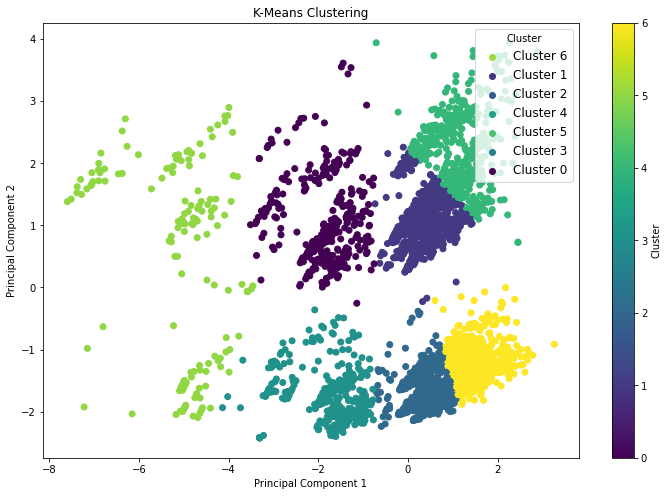

<Figure size 864x576 with 0 Axes>

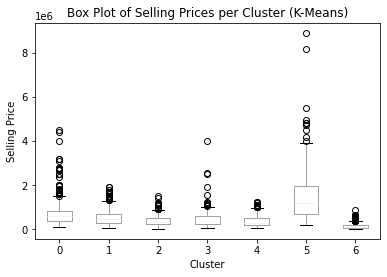

Statistics per Cluster (Hierarchical):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0        0        2.723242e+05            20001.0          1500001.0   
1        1        5.287849e+05            70001.0          8900001.0   
2        2        4.720002e+05            45001.0          1900001.0   
3        3        1.798096e+06           245001.0          8150001.0   
4        4        6.405449e+05            90001.0          4400001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              225001.0            1285                  39  
1              397501.0             412                  22  
2              400001.0            1315                  43  
3             1400001.0             147                   3  
4              550001.0             353                  19  


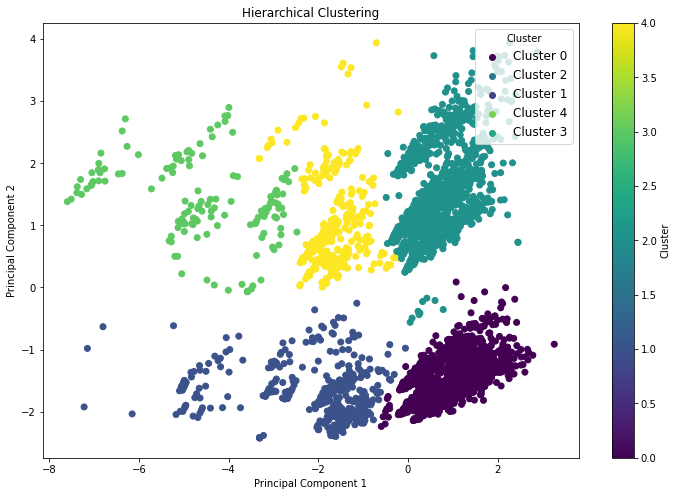

<Figure size 864x576 with 0 Axes>

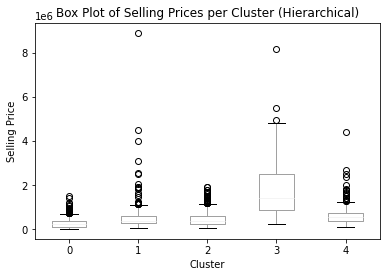

Silhouette Score for DBSCAN: 0.2953
Statistics per Cluster (DBSCAN):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0       -1        1.173549e+06            50001.0          8900001.0   
1        0        4.263531e+05            20001.0          4500001.0   
2        1        7.522926e+05           210001.0          4500001.0   
3        2        1.975122e+06           245001.0          8150001.0   
4        3        2.226546e+06          1050001.0          4950001.0   
5        4        1.027112e+06           650001.0          1350001.0   
6        5        8.515563e+05           541001.0          1119001.0   
7        6        1.106668e+06           700001.0          1700001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              825001.0              31                   2  
1              345001.0            3329                 136  
2              537501.0              48                   5  
3             1438001.0           

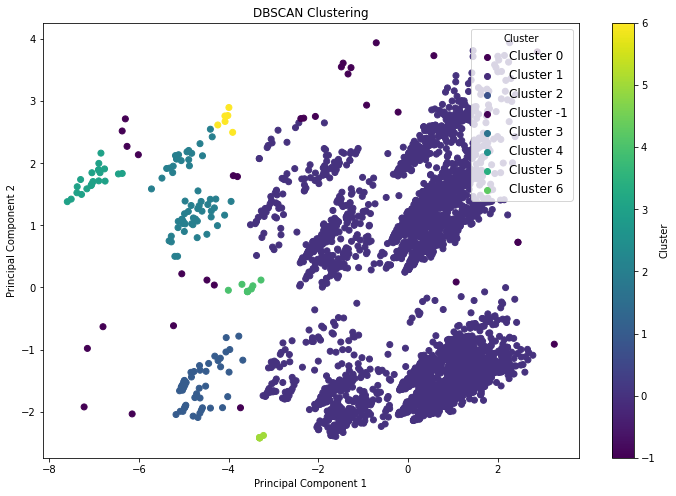

<Figure size 864x576 with 0 Axes>

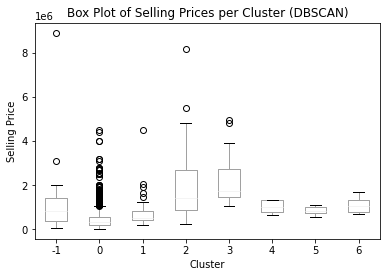

Statistics per Cluster (GMM):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0        0       958210.275194            75001.0          8150001.0   
1        1       476601.263437            45001.0          1900001.0   
2        2       272037.801402            20001.0          1500001.0   
3        3       525793.787724            70001.0          8900001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              650001.0             516                  48  
1              410000.0            1321                  38  
2              225001.0            1284                  40  
3              400001.0             391                  15  


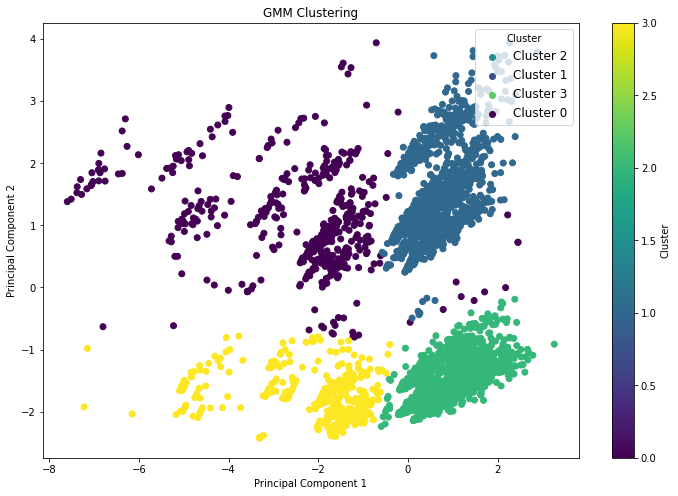

<Figure size 864x576 with 0 Axes>

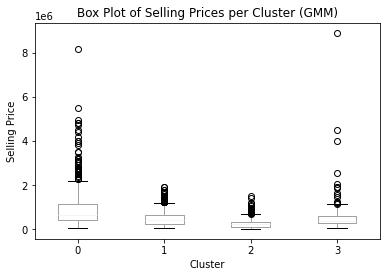

Saved all statistics for clusters across all methods.


In [1098]:
# Convert PCA DataFrame to NumPy array if necessary
X_cleaned_pca = np.array(pca_encoded_no_duplication_V3[['PCA1', 'PCA2']])

# Assume you have the log_SellingPrice in the original DataFrame
log_selling_prices = pca_encoded_no_duplication_V3['log_SellingPrice'].values
selling_prices = np.exp(log_selling_prices)

# Define parameters for clustering methods
params = {
    'K-Means': {
        'method': KMeans,
        'params': {'n_clusters': 7, 'random_state': 42}
    },
    'Hierarchical': {
        'method': AgglomerativeClustering,
        'params': {'n_clusters': 5, 'linkage': 'ward'}
    },
    'DBSCAN': {
        'method': DBSCAN,
        'params': {'eps': 0.46, 'min_samples': 8}
    },    
    'GMM': {
        'method': GaussianMixture,
        'params': {'n_components': 4, 'random_state': 42}
    }
}

# Dictionary to store mean, min, and max selling prices for each clustering method
stats_selling_price_per_cluster_all_methods = {}

for method_name, method_info in params.items():
    method = method_info['method']
    method_params = method_info['params']
    
    # Initialize and fit the model
    model = method(**method_params)
    if method_name == 'DBSCAN':
        clusters = model.fit_predict(X_cleaned_pca)
        silhouette_avg = silhouette_score(X_cleaned_pca, clusters)
        print(f"Silhouette Score for DBSCAN: {silhouette_avg:.4f}")
    else:
        clusters = model.fit_predict(X_cleaned_pca)
    
    # Create a DataFrame from the PCA array with selling prices
    df_with_clusters = pd.DataFrame(X_cleaned_pca, columns=['PCA1', 'PCA2'])
    df_with_clusters['Cluster'] = clusters
    df_with_clusters['Selling_Price'] = selling_prices
    
    # Calculate mean, min, max, median, count, and outliers for each cluster
    cluster_stats = df_with_clusters.groupby('Cluster')['Selling_Price'].agg(['mean', 'min', 'max', 'median', 'count']).reset_index()
    cluster_stats.columns = ['Cluster', 'Mean_Selling_Price', 'Min_Selling_Price', 'Max_Selling_Price', 'Median_Selling_Price', 'Number_of_Rows']
    
    
    # Calculate IQR and outliers
    outlier_counts = {}
    for cluster in df_with_clusters['Cluster'].unique():
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]['Selling_Price']
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = cluster_data[(cluster_data < lower_bound) | (cluster_data > upper_bound)]
        outlier_counts[cluster] = outliers.shape[0]
    
    # Add outlier counts to cluster_stats
    cluster_stats['Number_of_Outliers'] = cluster_stats['Cluster'].map(outlier_counts)
    stats_selling_price_per_cluster_all_methods[method_name] = cluster_stats
    
    print(f"Statistics per Cluster ({method_name}):")
    print(cluster_stats)
    
    # Save the clustered results and statistics to CSV files
    df_with_clusters.to_csv(f'clustered_data_{method_name}.csv', index=False)
    cluster_stats.to_csv(f'stats_selling_price_per_cluster_{method_name}.csv', index=False)
    

    # Define the colormap for clusters using 'viridis' or another color scheme
    cmap = plt.get_cmap('viridis')

    # Create a scatter plot with colored clusters and a color bar
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        df_with_clusters['PCA1'],
        df_with_clusters['PCA2'],
        c=df_with_clusters['Cluster'],
        cmap=cmap,
        marker='o'
    )
    

    # Title and labels
    plt.title(f'{method_name} Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add color bar with labels for clusters
    cbar = plt.colorbar(scatter, label='Cluster')

    # Add color-based legend for cluster numbers
    unique_clusters = df_with_clusters['Cluster'].unique()
    for cluster in unique_clusters:
        plt.scatter([], [], color=cmap(cluster / len(unique_clusters)), label=f'Cluster {cluster}')

    plt.legend(title="Cluster", loc='upper right', fontsize='large')

    # Show plot
    plt.show()
    
    # Box plot of Selling Prices for each cluster
    plt.figure(figsize=(12, 8))
    df_with_clusters.boxplot(column='Selling_Price', by='Cluster', grid=False)
    plt.title(f'Box Plot of Selling Prices per Cluster ({method_name})')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Cluster')
    plt.ylabel('Selling Price')
    plt.show()

# Save all statistics for comparison
if stats_selling_price_per_cluster_all_methods:
    all_stats_df = pd.concat(stats_selling_price_per_cluster_all_methods.values(), keys=stats_selling_price_per_cluster_all_methods.keys())
    all_stats_df.to_csv('stats_selling_price_per_cluster_all_methods.csv')
    print("Saved all statistics for clusters across all methods.")
else:
    print("No clustering results to save.")

## Statistics per Cluster (K-Means)

| Cluster | Mean Selling Price | Min Selling Price | Max Selling Price | Median Selling Price | Number of Rows | Number of Outliers |
|---------|---------------------|--------------------|--------------------|-----------------------|----------------|--------------------|
| 0       | 435,485.92          | 55,001.00          | 4,400,001.00       | 350,001.00            | 897            | 56                 |
| 1       | 337,541.49          | 20,001.00          | 8,900,001.00       | 265,001.00            | 1,710          | 61                 |
| 2       | 886,583.29          | 149,001.00         | 8,150,001.00       | 700,001.00            | 747            | 62                 |
| 3       | 288,996.36          | 45,001.00          | 1,250,001.00       | 225,001.00            | 218            | 19                 |

## Statistics per Cluster (GMM)

| Cluster | Mean Selling Price | Min Selling Price | Max Selling Price | Median Selling Price | Number of Rows | Number of Outliers |
|---------|---------------------|--------------------|--------------------|-----------------------|----------------|--------------------|
| 0       | 454,816.51          | 45,001.00          | 4,400,001.00       | 350,001.00            | 1,068          | 61                 |
| 1       | 337,314.93          | 20,001.00          | 8,900,001.00       | 265,001.00            | 1,689          | 59                 |
| 2       | 911,930.41          | 150,001.00         | 8,150,001.00       | 715,001.00            | 652            | 54                 |
| 3       | 264,160.44          | 45,001.00          | 1,050,001.00       | 200,001.00            | 163            | 11                 |


## Statistics per Cluster (GMM)

| Cluster | Mean Selling Price | Min Selling Price | Max Selling Price | Median Selling Price | Number of Rows | Number of Outliers |
|---------|---------------------|--------------------|--------------------|-----------------------|----------------|--------------------|
| 0       | 296,070.50          | 45,001.00          | 1,250,001.00       | 230,000.00            | 230            | 12                 |
| 1       | 337,128.50          | 20,001.00          | 8,900,001.00       | 265,001.00            | 1,696          | 60                 |
| 2       | 639,878.24          | 45,001.00          | 8,150,001.00       | 500,001.00            | 1,646          | 101                |


# <span style="color: #F333FF; font-weight: bold;">**7. Classification**</span>